# Exercizes on clustering

 Here you can find a program to read a data file in csv format. 
 The data file has the following heading:
    <number of samples>, <number of features>
    list of the names of the features (separated by comma)

The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.

In [3]:
import csv
import sys
from os.path import join
import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
    with open(join(file_path, file_name)) as csv_file:
        data_file = csv.reader(csv_file,delimiter=',')
        temp1 = next(data_file)
        n_samples = int(temp1[0])
        print("n_samples=" +str(n_samples))
        n_features = int(temp1[1])
        temp2 = next(data_file)
        feature_names = np.array(temp2[:n_features])
        data_list = [iter for iter in data_file]   
        data = np.asarray(data_list, dtype=np.float64)                  
    return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=150
n_samples=6118
n_samples=86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

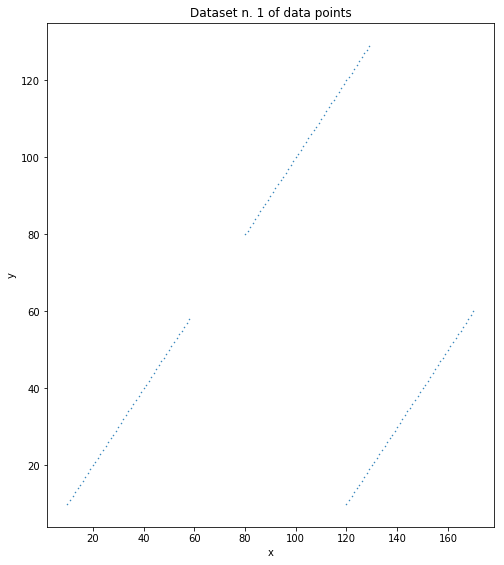

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')
ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])
#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)
#we use dots to represent our instances
plt.show()

The following is the program for plotting the dataset n.2

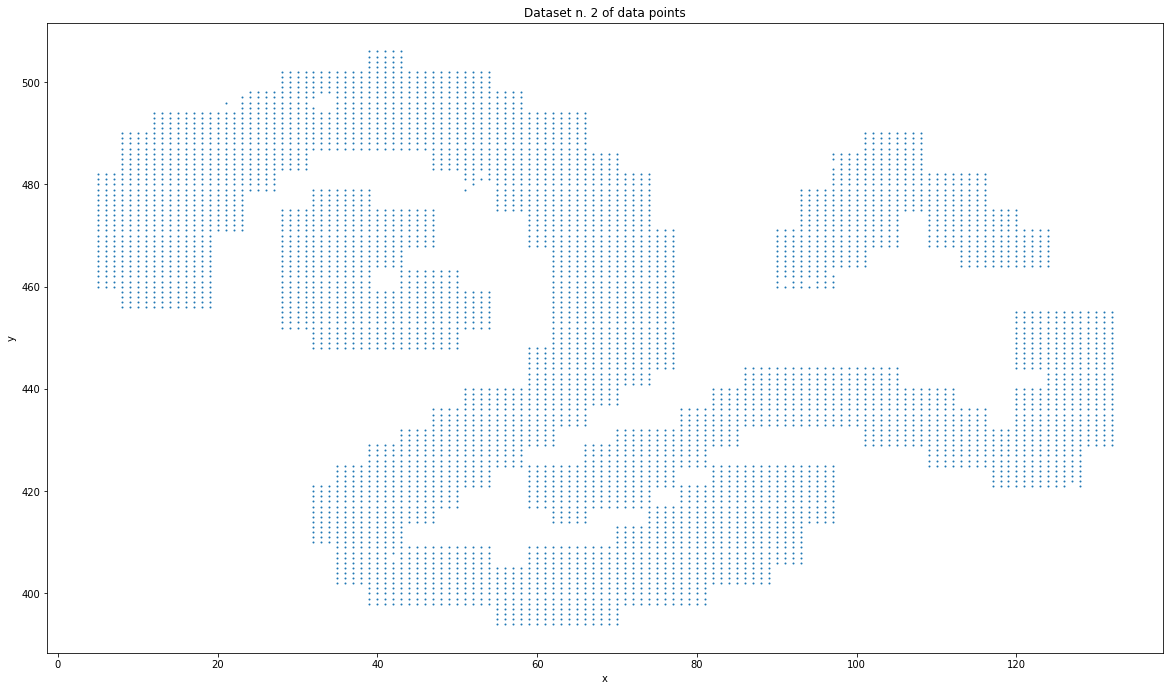

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')
ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])
#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)
plt.show()

The following is the program for plotting the dataset n.3

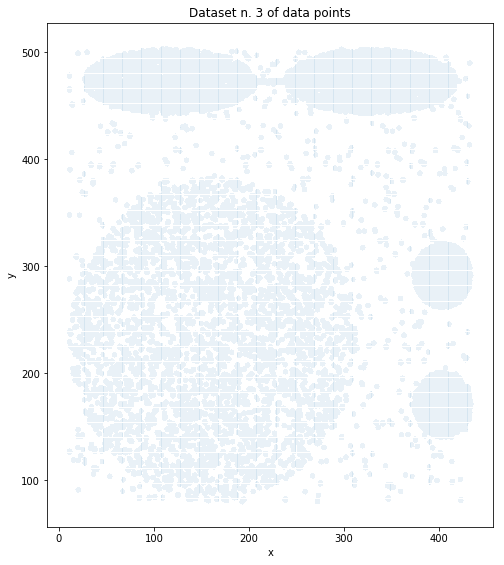

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')
ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])
#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=0.5, markeredgecolor = 'none')
plt.show()
#a chellange because il has cluster with different sizes

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [8]:
import csv
import sys
from os.path import join
import numpy as np
 
def load_data(file_path, file_name):
    with open(join(file_path, file_name)) as csv_file:
        data_file = csv.reader(csv_file,delimiter=',')
        temp1 = next(data_file)
        n_samples = int(temp1[0])
        n_features = int(temp1[1])
        temp2 = next(data_file)
        feature_names = np.array(temp2[:n_features])
        data_list = [iter for iter in data_file]       
        data = np.asarray(data_list, dtype=np.float64)                  
       
    return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans
np.random.seed(5)
k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")") 
    print("in cluster n."+str(kmeans1.labels_[i]))
arr = kmeans1.cluster_centers_   
print(arr)   
print(arr[0][0])
#come algoritmo usa gli centroidi e calcola la distanza tramite la distanza euclideana
#il centroide e' calcolato usando la media delle istance che cadono un quel cluster
#l'alg si ferma quando i i centroidi non cambiano piu' 
#ha lo svantaggio di dare in precedenza il nr k di cluster

Example n.0=(10.0,10.0)
in cluster n.0
Example n.1=(11.0,11.0)
in cluster n.0
Example n.2=(12.0,12.0)
in cluster n.0
Example n.3=(13.0,13.0)
in cluster n.0
Example n.4=(14.0,14.0)
in cluster n.0
Example n.5=(15.0,15.0)
in cluster n.0
Example n.6=(16.0,16.0)
in cluster n.0
Example n.7=(17.0,17.0)
in cluster n.0
Example n.8=(18.0,18.0)
in cluster n.0
Example n.9=(19.0,19.0)
in cluster n.0
Example n.10=(20.0,20.0)
in cluster n.0
Example n.11=(21.0,21.0)
in cluster n.0
Example n.12=(22.0,22.0)
in cluster n.0
Example n.13=(23.0,23.0)
in cluster n.0
Example n.14=(24.0,24.0)
in cluster n.0
Example n.15=(25.0,25.0)
in cluster n.0
Example n.16=(26.0,26.0)
in cluster n.0
Example n.17=(27.0,27.0)
in cluster n.0
Example n.18=(28.0,28.0)
in cluster n.0
Example n.19=(29.0,29.0)
in cluster n.0
Example n.20=(30.0,30.0)
in cluster n.0
Example n.21=(31.0,31.0)
in cluster n.0
Example n.22=(32.0,32.0)
in cluster n.0
Example n.23=(33.0,33.0)
in cluster n.0
Example n.24=(34.0,34.0)
in cluster n.0
Example n.

In the following program we plot the clusters

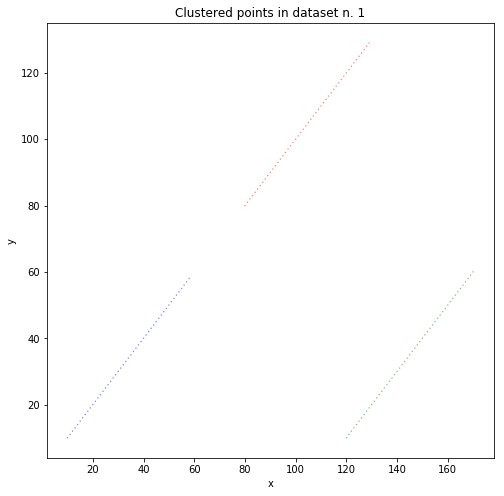

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_title('Clustered points in dataset n. 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    #nel nostro caso k=3
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cell we perform clustering with K-means on dataset2

In [20]:
file_path="./"
# all the three datasets contain data points on (x,y) 
file_name2="dataset-DBSCAN.csv"


data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)

from sklearn.cluster import KMeans
np.random.seed(5)
#questo e' un valore messo dal programmatore
k=3
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)
for i in range(n_samples2):
    print("Example n."+str(i)+"=("+str(data2[i,0])+","+str(data2[i,1])+")")
    print("in cluster n."+str(kmeans2.labels_[i]))

Example n.0=(5.0,482.0)
in cluster n.2
Example n.1=(5.0,481.0)
in cluster n.2
Example n.2=(5.0,480.0)
in cluster n.2
Example n.3=(5.0,479.0)
in cluster n.2
Example n.4=(5.0,478.0)
in cluster n.2
Example n.5=(5.0,477.0)
in cluster n.2
Example n.6=(5.0,476.0)
in cluster n.2
Example n.7=(5.0,475.0)
in cluster n.2
Example n.8=(5.0,474.0)
in cluster n.2
Example n.9=(5.0,473.0)
in cluster n.2
Example n.10=(5.0,472.0)
in cluster n.2
Example n.11=(5.0,471.0)
in cluster n.2
Example n.12=(5.0,470.0)
in cluster n.2
Example n.13=(5.0,469.0)
in cluster n.2
Example n.14=(5.0,468.0)
in cluster n.2
Example n.15=(5.0,467.0)
in cluster n.2
Example n.16=(5.0,466.0)
in cluster n.2
Example n.17=(5.0,465.0)
in cluster n.2
Example n.18=(5.0,464.0)
in cluster n.2
Example n.19=(5.0,463.0)
in cluster n.2
Example n.20=(5.0,462.0)
in cluster n.2
Example n.21=(5.0,461.0)
in cluster n.2
Example n.22=(5.0,460.0)
in cluster n.2
Example n.23=(6.0,482.0)
in cluster n.2
Example n.24=(6.0,481.0)
in cluster n.2
Example n.

in cluster n.2
Example n.457=(18.0,480.0)
in cluster n.2
Example n.458=(18.0,479.0)
in cluster n.2
Example n.459=(18.0,478.0)
in cluster n.2
Example n.460=(18.0,477.0)
in cluster n.2
Example n.461=(18.0,476.0)
in cluster n.2
Example n.462=(18.0,475.0)
in cluster n.2
Example n.463=(18.0,474.0)
in cluster n.2
Example n.464=(18.0,473.0)
in cluster n.2
Example n.465=(18.0,472.0)
in cluster n.2
Example n.466=(18.0,471.0)
in cluster n.2
Example n.467=(18.0,470.0)
in cluster n.2
Example n.468=(18.0,469.0)
in cluster n.2
Example n.469=(18.0,468.0)
in cluster n.2
Example n.470=(18.0,467.0)
in cluster n.2
Example n.471=(18.0,466.0)
in cluster n.2
Example n.472=(18.0,465.0)
in cluster n.2
Example n.473=(18.0,464.0)
in cluster n.2
Example n.474=(18.0,463.0)
in cluster n.2
Example n.475=(18.0,462.0)
in cluster n.2
Example n.476=(18.0,461.0)
in cluster n.2
Example n.477=(18.0,460.0)
in cluster n.2
Example n.478=(18.0,459.0)
in cluster n.2
Example n.479=(18.0,458.0)
in cluster n.2
Example n.480=(18.0

in cluster n.0
Example n.1115=(35.0,408.0)
in cluster n.0
Example n.1116=(35.0,407.0)
in cluster n.0
Example n.1117=(35.0,406.0)
in cluster n.0
Example n.1118=(35.0,405.0)
in cluster n.0
Example n.1119=(35.0,404.0)
in cluster n.0
Example n.1120=(35.0,403.0)
in cluster n.0
Example n.1121=(35.0,402.0)
in cluster n.0
Example n.1122=(36.0,502.0)
in cluster n.2
Example n.1123=(36.0,501.0)
in cluster n.2
Example n.1124=(36.0,500.0)
in cluster n.2
Example n.1125=(36.0,499.0)
in cluster n.2
Example n.1126=(36.0,498.0)
in cluster n.2
Example n.1127=(36.0,497.0)
in cluster n.2
Example n.1128=(36.0,496.0)
in cluster n.2
Example n.1129=(36.0,495.0)
in cluster n.2
Example n.1130=(36.0,494.0)
in cluster n.2
Example n.1131=(36.0,493.0)
in cluster n.2
Example n.1132=(36.0,492.0)
in cluster n.2
Example n.1133=(36.0,491.0)
in cluster n.2
Example n.1134=(36.0,490.0)
in cluster n.2
Example n.1135=(36.0,489.0)
in cluster n.2
Example n.1136=(36.0,488.0)
in cluster n.2
Example n.1137=(36.0,487.0)
in cluster 

Example n.2026=(48.0,500.0)
in cluster n.2
Example n.2027=(48.0,499.0)
in cluster n.2
Example n.2028=(48.0,498.0)
in cluster n.2
Example n.2029=(48.0,497.0)
in cluster n.2
Example n.2030=(48.0,496.0)
in cluster n.2
Example n.2031=(48.0,495.0)
in cluster n.2
Example n.2032=(48.0,494.0)
in cluster n.2
Example n.2033=(48.0,493.0)
in cluster n.2
Example n.2034=(48.0,492.0)
in cluster n.2
Example n.2035=(48.0,491.0)
in cluster n.2
Example n.2036=(48.0,490.0)
in cluster n.2
Example n.2037=(48.0,489.0)
in cluster n.2
Example n.2038=(48.0,488.0)
in cluster n.2
Example n.2039=(48.0,487.0)
in cluster n.2
Example n.2040=(48.0,486.0)
in cluster n.2
Example n.2041=(48.0,485.0)
in cluster n.2
Example n.2042=(48.0,484.0)
in cluster n.2
Example n.2043=(48.0,483.0)
in cluster n.2
Example n.2044=(48.0,463.0)
in cluster n.2
Example n.2045=(48.0,462.0)
in cluster n.2
Example n.2046=(48.0,461.0)
in cluster n.2
Example n.2047=(48.0,460.0)
in cluster n.2
Example n.2048=(48.0,459.0)
in cluster n.2
Example n.2

in cluster n.2
Example n.2856=(61.0,448.0)
in cluster n.0
Example n.2857=(61.0,447.0)
in cluster n.0
Example n.2858=(61.0,446.0)
in cluster n.0
Example n.2859=(61.0,445.0)
in cluster n.0
Example n.2860=(61.0,444.0)
in cluster n.0
Example n.2861=(61.0,443.0)
in cluster n.0
Example n.2862=(61.0,442.0)
in cluster n.0
Example n.2863=(61.0,441.0)
in cluster n.0
Example n.2864=(61.0,440.0)
in cluster n.0
Example n.2865=(61.0,439.0)
in cluster n.0
Example n.2866=(61.0,438.0)
in cluster n.0
Example n.2867=(61.0,437.0)
in cluster n.0
Example n.2868=(61.0,436.0)
in cluster n.0
Example n.2869=(61.0,435.0)
in cluster n.0
Example n.2870=(61.0,434.0)
in cluster n.0
Example n.2871=(61.0,433.0)
in cluster n.0
Example n.2872=(61.0,432.0)
in cluster n.0
Example n.2873=(61.0,431.0)
in cluster n.0
Example n.2874=(61.0,430.0)
in cluster n.0
Example n.2875=(61.0,429.0)
in cluster n.0
Example n.2876=(61.0,425.0)
in cluster n.0
Example n.2877=(61.0,424.0)
in cluster n.0
Example n.2878=(61.0,423.0)
in cluster 

in cluster n.0
Example n.3722=(71.0,442.0)
in cluster n.0
Example n.3723=(71.0,441.0)
in cluster n.0
Example n.3724=(71.0,432.0)
in cluster n.0
Example n.3725=(71.0,431.0)
in cluster n.0
Example n.3726=(71.0,430.0)
in cluster n.0
Example n.3727=(71.0,429.0)
in cluster n.0
Example n.3728=(71.0,428.0)
in cluster n.0
Example n.3729=(71.0,427.0)
in cluster n.0
Example n.3730=(71.0,426.0)
in cluster n.0
Example n.3731=(71.0,425.0)
in cluster n.0
Example n.3732=(71.0,424.0)
in cluster n.0
Example n.3733=(71.0,423.0)
in cluster n.0
Example n.3734=(71.0,422.0)
in cluster n.0
Example n.3735=(71.0,421.0)
in cluster n.0
Example n.3736=(71.0,420.0)
in cluster n.0
Example n.3737=(71.0,419.0)
in cluster n.0
Example n.3738=(71.0,418.0)
in cluster n.0
Example n.3739=(71.0,417.0)
in cluster n.0
Example n.3740=(71.0,413.0)
in cluster n.0
Example n.3741=(71.0,412.0)
in cluster n.0
Example n.3742=(71.0,411.0)
in cluster n.0
Example n.3743=(71.0,410.0)
in cluster n.0
Example n.3744=(71.0,409.0)
in cluster 

Example n.4482=(86.0,404.0)
in cluster n.0
Example n.4483=(86.0,403.0)
in cluster n.0
Example n.4484=(86.0,402.0)
in cluster n.0
Example n.4485=(87.0,444.0)
in cluster n.1
Example n.4486=(87.0,443.0)
in cluster n.1
Example n.4487=(87.0,442.0)
in cluster n.1
Example n.4488=(87.0,441.0)
in cluster n.1
Example n.4489=(87.0,440.0)
in cluster n.1
Example n.4490=(87.0,439.0)
in cluster n.1
Example n.4491=(87.0,438.0)
in cluster n.1
Example n.4492=(87.0,437.0)
in cluster n.1
Example n.4493=(87.0,436.0)
in cluster n.1
Example n.4494=(87.0,435.0)
in cluster n.1
Example n.4495=(87.0,434.0)
in cluster n.0
Example n.4496=(87.0,433.0)
in cluster n.0
Example n.4497=(87.0,425.0)
in cluster n.0
Example n.4498=(87.0,424.0)
in cluster n.0
Example n.4499=(87.0,423.0)
in cluster n.0
Example n.4500=(87.0,422.0)
in cluster n.0
Example n.4501=(87.0,421.0)
in cluster n.0
Example n.4502=(87.0,420.0)
in cluster n.0
Example n.4503=(87.0,419.0)
in cluster n.0
Example n.4504=(87.0,418.0)
in cluster n.0
Example n.4

in cluster n.1
Example n.5135=(102.0,436.0)
in cluster n.1
Example n.5136=(102.0,435.0)
in cluster n.1
Example n.5137=(102.0,434.0)
in cluster n.1
Example n.5138=(102.0,433.0)
in cluster n.1
Example n.5139=(102.0,432.0)
in cluster n.1
Example n.5140=(102.0,431.0)
in cluster n.1
Example n.5141=(102.0,430.0)
in cluster n.1
Example n.5142=(102.0,429.0)
in cluster n.1
Example n.5143=(103.0,490.0)
in cluster n.1
Example n.5144=(103.0,489.0)
in cluster n.1
Example n.5145=(103.0,488.0)
in cluster n.1
Example n.5146=(103.0,487.0)
in cluster n.1
Example n.5147=(103.0,486.0)
in cluster n.1
Example n.5148=(103.0,485.0)
in cluster n.1
Example n.5149=(103.0,484.0)
in cluster n.1
Example n.5150=(103.0,483.0)
in cluster n.1
Example n.5151=(103.0,482.0)
in cluster n.1
Example n.5152=(103.0,481.0)
in cluster n.1
Example n.5153=(103.0,480.0)
in cluster n.1
Example n.5154=(103.0,479.0)
in cluster n.1
Example n.5155=(103.0,478.0)
in cluster n.1
Example n.5156=(103.0,477.0)
in cluster n.1
Example n.5157=(1

in cluster n.1
Example n.6031=(129.0,434.0)
in cluster n.1
Example n.6032=(129.0,433.0)
in cluster n.1
Example n.6033=(129.0,432.0)
in cluster n.1
Example n.6034=(129.0,431.0)
in cluster n.1
Example n.6035=(129.0,430.0)
in cluster n.1
Example n.6036=(129.0,429.0)
in cluster n.1
Example n.6037=(130.0,455.0)
in cluster n.1
Example n.6038=(130.0,454.0)
in cluster n.1
Example n.6039=(130.0,453.0)
in cluster n.1
Example n.6040=(130.0,452.0)
in cluster n.1
Example n.6041=(130.0,451.0)
in cluster n.1
Example n.6042=(130.0,450.0)
in cluster n.1
Example n.6043=(130.0,449.0)
in cluster n.1
Example n.6044=(130.0,448.0)
in cluster n.1
Example n.6045=(130.0,447.0)
in cluster n.1
Example n.6046=(130.0,446.0)
in cluster n.1
Example n.6047=(130.0,445.0)
in cluster n.1
Example n.6048=(130.0,444.0)
in cluster n.1
Example n.6049=(130.0,443.0)
in cluster n.1
Example n.6050=(130.0,442.0)
in cluster n.1
Example n.6051=(130.0,441.0)
in cluster n.1
Example n.6052=(130.0,440.0)
in cluster n.1
Example n.6053=(1

In the following we plot clustering results on dataset2

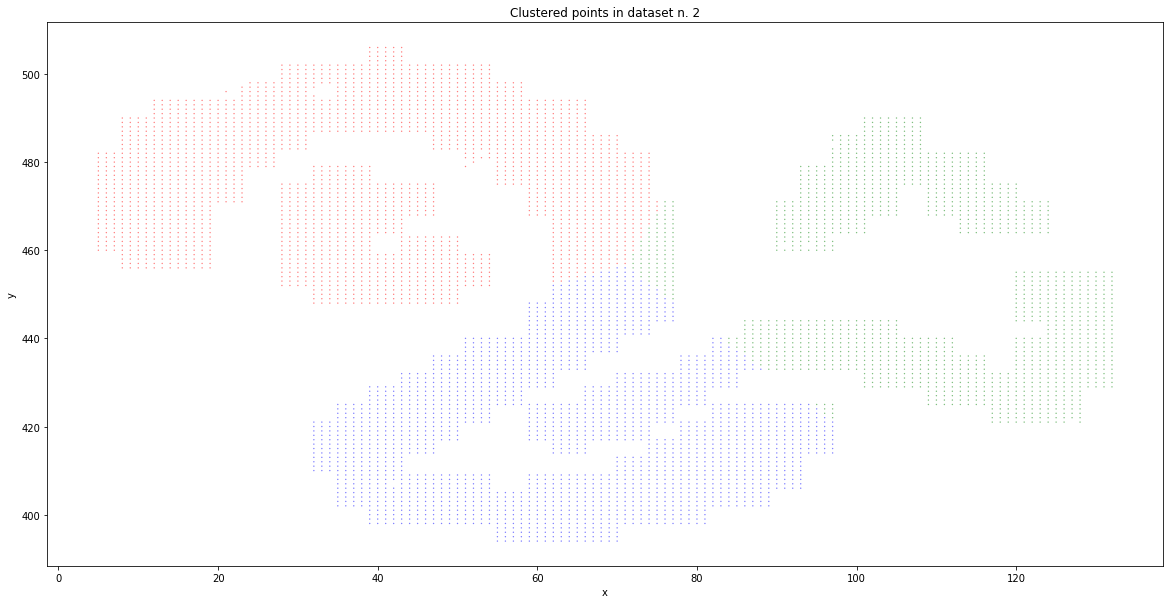

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_title('Clustered points in dataset n. 2')
ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data2[i,0] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    data_list_y = [data2[i,1] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)
plt.show()

We perform clustering with K-means on the remaining dataset3

In [26]:
file_path="./"
# all the three datasets contain data points on (x,y) 
file_name3="CURE-complete.csv"    
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)

from sklearn.cluster import KMeans
np.random.seed(5)
k=2
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)

for i in range(n_samples3):
    print("Example n."+str(i)+"=("+str(data3[i,0])+","+str(data3[i,1])+")")
    print("in cluster n."+str(kmeans3.labels_[i]))

Example n.0=(9.0,480.0)
in cluster n.0
Example n.1=(9.0,479.0)
in cluster n.0
Example n.2=(9.0,478.0)
in cluster n.0
Example n.3=(9.0,477.0)
in cluster n.0
Example n.4=(9.0,467.0)
in cluster n.0
Example n.5=(9.0,466.0)
in cluster n.0
Example n.6=(9.0,465.0)
in cluster n.0
Example n.7=(9.0,464.0)
in cluster n.0
Example n.8=(9.0,392.0)
in cluster n.0
Example n.9=(9.0,391.0)
in cluster n.0
Example n.10=(9.0,390.0)
in cluster n.0
Example n.11=(9.0,350.0)
in cluster n.1
Example n.12=(9.0,349.0)
in cluster n.1
Example n.13=(9.0,348.0)
in cluster n.1
Example n.14=(9.0,347.0)
in cluster n.1
Example n.15=(9.0,290.0)
in cluster n.1
Example n.16=(9.0,289.0)
in cluster n.1
Example n.17=(9.0,288.0)
in cluster n.1
Example n.18=(9.0,287.0)
in cluster n.1
Example n.19=(9.0,240.0)
in cluster n.1
Example n.20=(9.0,239.0)
in cluster n.1
Example n.21=(9.0,238.0)
in cluster n.1
Example n.22=(9.0,231.0)
in cluster n.1
Example n.23=(9.0,230.0)
in cluster n.1
Example n.24=(9.0,229.0)
in cluster n.1
Example n.

Example n.484=(16.0,203.0)
in cluster n.1
Example n.485=(16.0,202.0)
in cluster n.1
Example n.486=(16.0,201.0)
in cluster n.1
Example n.487=(16.0,200.0)
in cluster n.1
Example n.488=(16.0,199.0)
in cluster n.1
Example n.489=(16.0,198.0)
in cluster n.1
Example n.490=(16.0,197.0)
in cluster n.1
Example n.491=(16.0,196.0)
in cluster n.1
Example n.492=(16.0,195.0)
in cluster n.1
Example n.493=(16.0,194.0)
in cluster n.1
Example n.494=(16.0,193.0)
in cluster n.1
Example n.495=(16.0,192.0)
in cluster n.1
Example n.496=(16.0,122.0)
in cluster n.1
Example n.497=(16.0,121.0)
in cluster n.1
Example n.498=(16.0,120.0)
in cluster n.1
Example n.499=(16.0,119.0)
in cluster n.1
Example n.500=(16.0,118.0)
in cluster n.1
Example n.501=(16.0,117.0)
in cluster n.1
Example n.502=(17.0,500.0)
in cluster n.0
Example n.503=(17.0,499.0)
in cluster n.0
Example n.504=(17.0,498.0)
in cluster n.0
Example n.505=(17.0,312.0)
in cluster n.1
Example n.506=(17.0,311.0)
in cluster n.1
Example n.507=(17.0,310.0)
in clus

Example n.1490=(25.0,301.0)
in cluster n.1
Example n.1491=(25.0,300.0)
in cluster n.1
Example n.1492=(25.0,299.0)
in cluster n.1
Example n.1493=(25.0,296.0)
in cluster n.1
Example n.1494=(25.0,295.0)
in cluster n.1
Example n.1495=(25.0,294.0)
in cluster n.1
Example n.1496=(25.0,293.0)
in cluster n.1
Example n.1497=(25.0,292.0)
in cluster n.1
Example n.1498=(25.0,291.0)
in cluster n.1
Example n.1499=(25.0,287.0)
in cluster n.1
Example n.1500=(25.0,286.0)
in cluster n.1
Example n.1501=(25.0,285.0)
in cluster n.1
Example n.1502=(25.0,284.0)
in cluster n.1
Example n.1503=(25.0,283.0)
in cluster n.1
Example n.1504=(25.0,282.0)
in cluster n.1
Example n.1505=(25.0,281.0)
in cluster n.1
Example n.1506=(25.0,280.0)
in cluster n.1
Example n.1507=(25.0,279.0)
in cluster n.1
Example n.1508=(25.0,278.0)
in cluster n.1
Example n.1509=(25.0,277.0)
in cluster n.1
Example n.1510=(25.0,276.0)
in cluster n.1
Example n.1511=(25.0,275.0)
in cluster n.1
Example n.1512=(25.0,274.0)
in cluster n.1
Example n.1

in cluster n.1
Example n.2490=(31.0,223.0)
in cluster n.1
Example n.2491=(31.0,218.0)
in cluster n.1
Example n.2492=(31.0,217.0)
in cluster n.1
Example n.2493=(31.0,216.0)
in cluster n.1
Example n.2494=(31.0,215.0)
in cluster n.1
Example n.2495=(31.0,214.0)
in cluster n.1
Example n.2496=(31.0,213.0)
in cluster n.1
Example n.2497=(31.0,212.0)
in cluster n.1
Example n.2498=(31.0,211.0)
in cluster n.1
Example n.2499=(31.0,210.0)
in cluster n.1
Example n.2500=(31.0,209.0)
in cluster n.1
Example n.2501=(31.0,204.0)
in cluster n.1
Example n.2502=(31.0,203.0)
in cluster n.1
Example n.2503=(31.0,202.0)
in cluster n.1
Example n.2504=(31.0,201.0)
in cluster n.1
Example n.2505=(31.0,200.0)
in cluster n.1
Example n.2506=(31.0,199.0)
in cluster n.1
Example n.2507=(31.0,198.0)
in cluster n.1
Example n.2508=(31.0,197.0)
in cluster n.1
Example n.2509=(31.0,196.0)
in cluster n.1
Example n.2510=(31.0,195.0)
in cluster n.1
Example n.2511=(31.0,194.0)
in cluster n.1
Example n.2512=(31.0,193.0)
in cluster 

Example n.3475=(37.0,266.0)
in cluster n.1
Example n.3476=(37.0,265.0)
in cluster n.1
Example n.3477=(37.0,264.0)
in cluster n.1
Example n.3478=(37.0,263.0)
in cluster n.1
Example n.3479=(37.0,262.0)
in cluster n.1
Example n.3480=(37.0,261.0)
in cluster n.1
Example n.3481=(37.0,260.0)
in cluster n.1
Example n.3482=(37.0,259.0)
in cluster n.1
Example n.3483=(37.0,258.0)
in cluster n.1
Example n.3484=(37.0,257.0)
in cluster n.1
Example n.3485=(37.0,256.0)
in cluster n.1
Example n.3486=(37.0,255.0)
in cluster n.1
Example n.3487=(37.0,254.0)
in cluster n.1
Example n.3488=(37.0,253.0)
in cluster n.1
Example n.3489=(37.0,252.0)
in cluster n.1
Example n.3490=(37.0,245.0)
in cluster n.1
Example n.3491=(37.0,244.0)
in cluster n.1
Example n.3492=(37.0,243.0)
in cluster n.1
Example n.3493=(37.0,242.0)
in cluster n.1
Example n.3494=(37.0,241.0)
in cluster n.1
Example n.3495=(37.0,240.0)
in cluster n.1
Example n.3496=(37.0,239.0)
in cluster n.1
Example n.3497=(37.0,238.0)
in cluster n.1
Example n.3

in cluster n.1
Example n.4476=(42.0,227.0)
in cluster n.1
Example n.4477=(42.0,226.0)
in cluster n.1
Example n.4478=(42.0,225.0)
in cluster n.1
Example n.4479=(42.0,215.0)
in cluster n.1
Example n.4480=(42.0,214.0)
in cluster n.1
Example n.4481=(42.0,213.0)
in cluster n.1
Example n.4482=(42.0,212.0)
in cluster n.1
Example n.4483=(42.0,211.0)
in cluster n.1
Example n.4484=(42.0,210.0)
in cluster n.1
Example n.4485=(42.0,209.0)
in cluster n.1
Example n.4486=(42.0,208.0)
in cluster n.1
Example n.4487=(42.0,207.0)
in cluster n.1
Example n.4488=(42.0,206.0)
in cluster n.1
Example n.4489=(42.0,205.0)
in cluster n.1
Example n.4490=(42.0,204.0)
in cluster n.1
Example n.4491=(42.0,203.0)
in cluster n.1
Example n.4492=(42.0,202.0)
in cluster n.1
Example n.4493=(42.0,201.0)
in cluster n.1
Example n.4494=(42.0,200.0)
in cluster n.1
Example n.4495=(42.0,199.0)
in cluster n.1
Example n.4496=(42.0,189.0)
in cluster n.1
Example n.4497=(42.0,188.0)
in cluster n.1
Example n.4498=(42.0,187.0)
in cluster 

Example n.5473=(47.0,259.0)
in cluster n.1
Example n.5474=(47.0,258.0)
in cluster n.1
Example n.5475=(47.0,257.0)
in cluster n.1
Example n.5476=(47.0,256.0)
in cluster n.1
Example n.5477=(47.0,255.0)
in cluster n.1
Example n.5478=(47.0,254.0)
in cluster n.1
Example n.5479=(47.0,253.0)
in cluster n.1
Example n.5480=(47.0,252.0)
in cluster n.1
Example n.5481=(47.0,251.0)
in cluster n.1
Example n.5482=(47.0,250.0)
in cluster n.1
Example n.5483=(47.0,249.0)
in cluster n.1
Example n.5484=(47.0,248.0)
in cluster n.1
Example n.5485=(47.0,247.0)
in cluster n.1
Example n.5486=(47.0,246.0)
in cluster n.1
Example n.5487=(47.0,245.0)
in cluster n.1
Example n.5488=(47.0,244.0)
in cluster n.1
Example n.5489=(47.0,243.0)
in cluster n.1
Example n.5490=(47.0,242.0)
in cluster n.1
Example n.5491=(47.0,241.0)
in cluster n.1
Example n.5492=(47.0,240.0)
in cluster n.1
Example n.5493=(47.0,239.0)
in cluster n.1
Example n.5494=(47.0,238.0)
in cluster n.1
Example n.5495=(47.0,237.0)
in cluster n.1
Example n.5

Example n.6371=(51.0,138.0)
in cluster n.1
Example n.6372=(51.0,137.0)
in cluster n.1
Example n.6373=(51.0,136.0)
in cluster n.1
Example n.6374=(51.0,135.0)
in cluster n.1
Example n.6375=(51.0,134.0)
in cluster n.1
Example n.6376=(51.0,133.0)
in cluster n.1
Example n.6377=(51.0,132.0)
in cluster n.1
Example n.6378=(51.0,131.0)
in cluster n.1
Example n.6379=(51.0,130.0)
in cluster n.1
Example n.6380=(51.0,129.0)
in cluster n.1
Example n.6381=(51.0,128.0)
in cluster n.1
Example n.6382=(51.0,105.0)
in cluster n.1
Example n.6383=(51.0,104.0)
in cluster n.1
Example n.6384=(51.0,103.0)
in cluster n.1
Example n.6385=(52.0,495.0)
in cluster n.0
Example n.6386=(52.0,494.0)
in cluster n.0
Example n.6387=(52.0,493.0)
in cluster n.0
Example n.6388=(52.0,492.0)
in cluster n.0
Example n.6389=(52.0,491.0)
in cluster n.0
Example n.6390=(52.0,490.0)
in cluster n.0
Example n.6391=(52.0,489.0)
in cluster n.0
Example n.6392=(52.0,488.0)
in cluster n.0
Example n.6393=(52.0,487.0)
in cluster n.0
Example n.6

in cluster n.1
Example n.7244=(55.0,126.0)
in cluster n.1
Example n.7245=(55.0,106.0)
in cluster n.1
Example n.7246=(55.0,105.0)
in cluster n.1
Example n.7247=(55.0,104.0)
in cluster n.1
Example n.7248=(55.0,103.0)
in cluster n.1
Example n.7249=(55.0,102.0)
in cluster n.1
Example n.7250=(56.0,497.0)
in cluster n.0
Example n.7251=(56.0,496.0)
in cluster n.0
Example n.7252=(56.0,495.0)
in cluster n.0
Example n.7253=(56.0,494.0)
in cluster n.0
Example n.7254=(56.0,493.0)
in cluster n.0
Example n.7255=(56.0,492.0)
in cluster n.0
Example n.7256=(56.0,491.0)
in cluster n.0
Example n.7257=(56.0,490.0)
in cluster n.0
Example n.7258=(56.0,489.0)
in cluster n.0
Example n.7259=(56.0,488.0)
in cluster n.0
Example n.7260=(56.0,487.0)
in cluster n.0
Example n.7261=(56.0,486.0)
in cluster n.0
Example n.7262=(56.0,485.0)
in cluster n.0
Example n.7263=(56.0,484.0)
in cluster n.0
Example n.7264=(56.0,483.0)
in cluster n.0
Example n.7265=(56.0,482.0)
in cluster n.0
Example n.7266=(56.0,481.0)
in cluster 

Example n.8215=(60.0,463.0)
in cluster n.0
Example n.8216=(60.0,462.0)
in cluster n.0
Example n.8217=(60.0,461.0)
in cluster n.0
Example n.8218=(60.0,460.0)
in cluster n.0
Example n.8219=(60.0,459.0)
in cluster n.0
Example n.8220=(60.0,458.0)
in cluster n.0
Example n.8221=(60.0,457.0)
in cluster n.0
Example n.8222=(60.0,456.0)
in cluster n.0
Example n.8223=(60.0,455.0)
in cluster n.0
Example n.8224=(60.0,454.0)
in cluster n.0
Example n.8225=(60.0,453.0)
in cluster n.0
Example n.8226=(60.0,452.0)
in cluster n.0
Example n.8227=(60.0,451.0)
in cluster n.0
Example n.8228=(60.0,450.0)
in cluster n.0
Example n.8229=(60.0,449.0)
in cluster n.0
Example n.8230=(60.0,448.0)
in cluster n.0
Example n.8231=(60.0,435.0)
in cluster n.0
Example n.8232=(60.0,434.0)
in cluster n.0
Example n.8233=(60.0,433.0)
in cluster n.0
Example n.8234=(60.0,432.0)
in cluster n.0
Example n.8235=(60.0,428.0)
in cluster n.0
Example n.8236=(60.0,427.0)
in cluster n.0
Example n.8237=(60.0,426.0)
in cluster n.0
Example n.8

in cluster n.1
Example n.9027=(63.0,142.0)
in cluster n.1
Example n.9028=(63.0,141.0)
in cluster n.1
Example n.9029=(63.0,140.0)
in cluster n.1
Example n.9030=(63.0,139.0)
in cluster n.1
Example n.9031=(63.0,138.0)
in cluster n.1
Example n.9032=(63.0,137.0)
in cluster n.1
Example n.9033=(63.0,136.0)
in cluster n.1
Example n.9034=(63.0,135.0)
in cluster n.1
Example n.9035=(63.0,134.0)
in cluster n.1
Example n.9036=(63.0,133.0)
in cluster n.1
Example n.9037=(63.0,132.0)
in cluster n.1
Example n.9038=(63.0,131.0)
in cluster n.1
Example n.9039=(63.0,130.0)
in cluster n.1
Example n.9040=(63.0,129.0)
in cluster n.1
Example n.9041=(63.0,128.0)
in cluster n.1
Example n.9042=(63.0,127.0)
in cluster n.1
Example n.9043=(63.0,126.0)
in cluster n.1
Example n.9044=(63.0,125.0)
in cluster n.1
Example n.9045=(63.0,123.0)
in cluster n.1
Example n.9046=(63.0,122.0)
in cluster n.1
Example n.9047=(63.0,121.0)
in cluster n.1
Example n.9048=(63.0,120.0)
in cluster n.1
Example n.9049=(63.0,119.0)
in cluster 

Example n.9965=(67.0,121.0)
in cluster n.1
Example n.9966=(67.0,120.0)
in cluster n.1
Example n.9967=(67.0,119.0)
in cluster n.1
Example n.9968=(67.0,118.0)
in cluster n.1
Example n.9969=(67.0,117.0)
in cluster n.1
Example n.9970=(67.0,103.0)
in cluster n.1
Example n.9971=(67.0,102.0)
in cluster n.1
Example n.9972=(67.0,101.0)
in cluster n.1
Example n.9973=(67.0,100.0)
in cluster n.1
Example n.9974=(67.0,99.0)
in cluster n.1
Example n.9975=(67.0,98.0)
in cluster n.1
Example n.9976=(67.0,93.0)
in cluster n.1
Example n.9977=(67.0,92.0)
in cluster n.1
Example n.9978=(67.0,91.0)
in cluster n.1
Example n.9979=(67.0,90.0)
in cluster n.1
Example n.9980=(67.0,89.0)
in cluster n.1
Example n.9981=(67.0,88.0)
in cluster n.1
Example n.9982=(68.0,501.0)
in cluster n.0
Example n.9983=(68.0,500.0)
in cluster n.0
Example n.9984=(68.0,499.0)
in cluster n.0
Example n.9985=(68.0,498.0)
in cluster n.0
Example n.9986=(68.0,497.0)
in cluster n.0
Example n.9987=(68.0,496.0)
in cluster n.0
Example n.9988=(68.

Example n.10831=(71.0,190.0)
in cluster n.1
Example n.10832=(71.0,189.0)
in cluster n.1
Example n.10833=(71.0,188.0)
in cluster n.1
Example n.10834=(71.0,187.0)
in cluster n.1
Example n.10835=(71.0,186.0)
in cluster n.1
Example n.10836=(71.0,185.0)
in cluster n.1
Example n.10837=(71.0,184.0)
in cluster n.1
Example n.10838=(71.0,183.0)
in cluster n.1
Example n.10839=(71.0,182.0)
in cluster n.1
Example n.10840=(71.0,181.0)
in cluster n.1
Example n.10841=(71.0,180.0)
in cluster n.1
Example n.10842=(71.0,179.0)
in cluster n.1
Example n.10843=(71.0,178.0)
in cluster n.1
Example n.10844=(71.0,177.0)
in cluster n.1
Example n.10845=(71.0,174.0)
in cluster n.1
Example n.10846=(71.0,173.0)
in cluster n.1
Example n.10847=(71.0,172.0)
in cluster n.1
Example n.10848=(71.0,171.0)
in cluster n.1
Example n.10849=(71.0,170.0)
in cluster n.1
Example n.10850=(71.0,169.0)
in cluster n.1
Example n.10851=(71.0,168.0)
in cluster n.1
Example n.10852=(71.0,167.0)
in cluster n.1
Example n.10853=(71.0,166.0)
in 

in cluster n.1
Example n.11736=(75.0,243.0)
in cluster n.1
Example n.11737=(75.0,242.0)
in cluster n.1
Example n.11738=(75.0,241.0)
in cluster n.1
Example n.11739=(75.0,240.0)
in cluster n.1
Example n.11740=(75.0,239.0)
in cluster n.1
Example n.11741=(75.0,238.0)
in cluster n.1
Example n.11742=(75.0,235.0)
in cluster n.1
Example n.11743=(75.0,234.0)
in cluster n.1
Example n.11744=(75.0,233.0)
in cluster n.1
Example n.11745=(75.0,232.0)
in cluster n.1
Example n.11746=(75.0,231.0)
in cluster n.1
Example n.11747=(75.0,230.0)
in cluster n.1
Example n.11748=(75.0,229.0)
in cluster n.1
Example n.11749=(75.0,228.0)
in cluster n.1
Example n.11750=(75.0,227.0)
in cluster n.1
Example n.11751=(75.0,226.0)
in cluster n.1
Example n.11752=(75.0,225.0)
in cluster n.1
Example n.11753=(75.0,221.0)
in cluster n.1
Example n.11754=(75.0,220.0)
in cluster n.1
Example n.11755=(75.0,219.0)
in cluster n.1
Example n.11756=(75.0,218.0)
in cluster n.1
Example n.11757=(75.0,217.0)
in cluster n.1
Example n.11758=(

Example n.12740=(79.0,262.0)
in cluster n.1
Example n.12741=(79.0,261.0)
in cluster n.1
Example n.12742=(79.0,260.0)
in cluster n.1
Example n.12743=(79.0,255.0)
in cluster n.1
Example n.12744=(79.0,254.0)
in cluster n.1
Example n.12745=(79.0,253.0)
in cluster n.1
Example n.12746=(79.0,252.0)
in cluster n.1
Example n.12747=(79.0,251.0)
in cluster n.1
Example n.12748=(79.0,250.0)
in cluster n.1
Example n.12749=(79.0,249.0)
in cluster n.1
Example n.12750=(79.0,248.0)
in cluster n.1
Example n.12751=(79.0,244.0)
in cluster n.1
Example n.12752=(79.0,243.0)
in cluster n.1
Example n.12753=(79.0,242.0)
in cluster n.1
Example n.12754=(79.0,241.0)
in cluster n.1
Example n.12755=(79.0,240.0)
in cluster n.1
Example n.12756=(79.0,239.0)
in cluster n.1
Example n.12757=(79.0,238.0)
in cluster n.1
Example n.12758=(79.0,237.0)
in cluster n.1
Example n.12759=(79.0,236.0)
in cluster n.1
Example n.12760=(79.0,235.0)
in cluster n.1
Example n.12761=(79.0,234.0)
in cluster n.1
Example n.12762=(79.0,233.0)
in 

in cluster n.1
Example n.13734=(83.0,339.0)
in cluster n.1
Example n.13735=(83.0,338.0)
in cluster n.1
Example n.13736=(83.0,337.0)
in cluster n.1
Example n.13737=(83.0,336.0)
in cluster n.1
Example n.13738=(83.0,335.0)
in cluster n.1
Example n.13739=(83.0,334.0)
in cluster n.1
Example n.13740=(83.0,333.0)
in cluster n.1
Example n.13741=(83.0,332.0)
in cluster n.1
Example n.13742=(83.0,331.0)
in cluster n.1
Example n.13743=(83.0,330.0)
in cluster n.1
Example n.13744=(83.0,329.0)
in cluster n.1
Example n.13745=(83.0,328.0)
in cluster n.1
Example n.13746=(83.0,327.0)
in cluster n.1
Example n.13747=(83.0,326.0)
in cluster n.1
Example n.13748=(83.0,325.0)
in cluster n.1
Example n.13749=(83.0,324.0)
in cluster n.1
Example n.13750=(83.0,323.0)
in cluster n.1
Example n.13751=(83.0,322.0)
in cluster n.1
Example n.13752=(83.0,319.0)
in cluster n.1
Example n.13753=(83.0,318.0)
in cluster n.1
Example n.13754=(83.0,317.0)
in cluster n.1
Example n.13755=(83.0,316.0)
in cluster n.1
Example n.13756=(

Example n.14715=(86.0,153.0)
in cluster n.1
Example n.14716=(86.0,152.0)
in cluster n.1
Example n.14717=(86.0,151.0)
in cluster n.1
Example n.14718=(86.0,150.0)
in cluster n.1
Example n.14719=(86.0,149.0)
in cluster n.1
Example n.14720=(86.0,148.0)
in cluster n.1
Example n.14721=(86.0,147.0)
in cluster n.1
Example n.14722=(86.0,146.0)
in cluster n.1
Example n.14723=(86.0,145.0)
in cluster n.1
Example n.14724=(86.0,144.0)
in cluster n.1
Example n.14725=(86.0,142.0)
in cluster n.1
Example n.14726=(86.0,141.0)
in cluster n.1
Example n.14727=(86.0,140.0)
in cluster n.1
Example n.14728=(86.0,139.0)
in cluster n.1
Example n.14729=(86.0,138.0)
in cluster n.1
Example n.14730=(86.0,137.0)
in cluster n.1
Example n.14731=(86.0,135.0)
in cluster n.1
Example n.14732=(86.0,134.0)
in cluster n.1
Example n.14733=(86.0,133.0)
in cluster n.1
Example n.14734=(86.0,132.0)
in cluster n.1
Example n.14735=(86.0,131.0)
in cluster n.1
Example n.14736=(86.0,130.0)
in cluster n.1
Example n.14737=(86.0,129.0)
in 

in cluster n.1
Example n.15635=(90.0,319.0)
in cluster n.1
Example n.15636=(90.0,318.0)
in cluster n.1
Example n.15637=(90.0,317.0)
in cluster n.1
Example n.15638=(90.0,316.0)
in cluster n.1
Example n.15639=(90.0,315.0)
in cluster n.1
Example n.15640=(90.0,314.0)
in cluster n.1
Example n.15641=(90.0,313.0)
in cluster n.1
Example n.15642=(90.0,312.0)
in cluster n.1
Example n.15643=(90.0,311.0)
in cluster n.1
Example n.15644=(90.0,310.0)
in cluster n.1
Example n.15645=(90.0,309.0)
in cluster n.1
Example n.15646=(90.0,308.0)
in cluster n.1
Example n.15647=(90.0,307.0)
in cluster n.1
Example n.15648=(90.0,306.0)
in cluster n.1
Example n.15649=(90.0,305.0)
in cluster n.1
Example n.15650=(90.0,304.0)
in cluster n.1
Example n.15651=(90.0,303.0)
in cluster n.1
Example n.15652=(90.0,302.0)
in cluster n.1
Example n.15653=(90.0,301.0)
in cluster n.1
Example n.15654=(90.0,298.0)
in cluster n.1
Example n.15655=(90.0,297.0)
in cluster n.1
Example n.15656=(90.0,296.0)
in cluster n.1
Example n.15657=(

in cluster n.1
Example n.16482=(93.0,102.0)
in cluster n.1
Example n.16483=(93.0,101.0)
in cluster n.1
Example n.16484=(93.0,100.0)
in cluster n.1
Example n.16485=(93.0,99.0)
in cluster n.1
Example n.16486=(93.0,98.0)
in cluster n.1
Example n.16487=(93.0,86.0)
in cluster n.1
Example n.16488=(93.0,85.0)
in cluster n.1
Example n.16489=(93.0,84.0)
in cluster n.1
Example n.16490=(93.0,83.0)
in cluster n.1
Example n.16491=(93.0,82.0)
in cluster n.1
Example n.16492=(94.0,504.0)
in cluster n.0
Example n.16493=(94.0,503.0)
in cluster n.0
Example n.16494=(94.0,502.0)
in cluster n.0
Example n.16495=(94.0,501.0)
in cluster n.0
Example n.16496=(94.0,500.0)
in cluster n.0
Example n.16497=(94.0,499.0)
in cluster n.0
Example n.16498=(94.0,498.0)
in cluster n.0
Example n.16499=(94.0,497.0)
in cluster n.0
Example n.16500=(94.0,496.0)
in cluster n.0
Example n.16501=(94.0,495.0)
in cluster n.0
Example n.16502=(94.0,494.0)
in cluster n.0
Example n.16503=(94.0,493.0)
in cluster n.0
Example n.16504=(94.0,49

Example n.17479=(97.0,224.0)
in cluster n.1
Example n.17480=(97.0,223.0)
in cluster n.1
Example n.17481=(97.0,222.0)
in cluster n.1
Example n.17482=(97.0,221.0)
in cluster n.1
Example n.17483=(97.0,220.0)
in cluster n.1
Example n.17484=(97.0,218.0)
in cluster n.1
Example n.17485=(97.0,217.0)
in cluster n.1
Example n.17486=(97.0,216.0)
in cluster n.1
Example n.17487=(97.0,215.0)
in cluster n.1
Example n.17488=(97.0,214.0)
in cluster n.1
Example n.17489=(97.0,213.0)
in cluster n.1
Example n.17490=(97.0,212.0)
in cluster n.1
Example n.17491=(97.0,211.0)
in cluster n.1
Example n.17492=(97.0,210.0)
in cluster n.1
Example n.17493=(97.0,209.0)
in cluster n.1
Example n.17494=(97.0,208.0)
in cluster n.1
Example n.17495=(97.0,207.0)
in cluster n.1
Example n.17496=(97.0,206.0)
in cluster n.1
Example n.17497=(97.0,205.0)
in cluster n.1
Example n.17498=(97.0,204.0)
in cluster n.1
Example n.17499=(97.0,203.0)
in cluster n.1
Example n.17500=(97.0,202.0)
in cluster n.1
Example n.17501=(97.0,201.0)
in 

in cluster n.0
Example n.18434=(101.0,472.0)
in cluster n.0
Example n.18435=(101.0,471.0)
in cluster n.0
Example n.18436=(101.0,470.0)
in cluster n.0
Example n.18437=(101.0,469.0)
in cluster n.0
Example n.18438=(101.0,468.0)
in cluster n.0
Example n.18439=(101.0,467.0)
in cluster n.0
Example n.18440=(101.0,466.0)
in cluster n.0
Example n.18441=(101.0,465.0)
in cluster n.0
Example n.18442=(101.0,464.0)
in cluster n.0
Example n.18443=(101.0,463.0)
in cluster n.0
Example n.18444=(101.0,462.0)
in cluster n.0
Example n.18445=(101.0,461.0)
in cluster n.0
Example n.18446=(101.0,460.0)
in cluster n.0
Example n.18447=(101.0,459.0)
in cluster n.0
Example n.18448=(101.0,458.0)
in cluster n.0
Example n.18449=(101.0,457.0)
in cluster n.0
Example n.18450=(101.0,456.0)
in cluster n.0
Example n.18451=(101.0,455.0)
in cluster n.0
Example n.18452=(101.0,454.0)
in cluster n.0
Example n.18453=(101.0,453.0)
in cluster n.0
Example n.18454=(101.0,452.0)
in cluster n.0
Example n.18455=(101.0,451.0)
in cluster

Example n.19222=(104.0,356.0)
in cluster n.0
Example n.19223=(104.0,355.0)
in cluster n.0
Example n.19224=(104.0,354.0)
in cluster n.0
Example n.19225=(104.0,353.0)
in cluster n.0
Example n.19226=(104.0,352.0)
in cluster n.0
Example n.19227=(104.0,351.0)
in cluster n.0
Example n.19228=(104.0,350.0)
in cluster n.0
Example n.19229=(104.0,349.0)
in cluster n.0
Example n.19230=(104.0,348.0)
in cluster n.0
Example n.19231=(104.0,347.0)
in cluster n.0
Example n.19232=(104.0,346.0)
in cluster n.0
Example n.19233=(104.0,345.0)
in cluster n.0
Example n.19234=(104.0,344.0)
in cluster n.0
Example n.19235=(104.0,343.0)
in cluster n.0
Example n.19236=(104.0,342.0)
in cluster n.0
Example n.19237=(104.0,341.0)
in cluster n.0
Example n.19238=(104.0,340.0)
in cluster n.1
Example n.19239=(104.0,339.0)
in cluster n.1
Example n.19240=(104.0,338.0)
in cluster n.1
Example n.19241=(104.0,337.0)
in cluster n.1
Example n.19242=(104.0,336.0)
in cluster n.1
Example n.19243=(104.0,335.0)
in cluster n.1
Example n.

Example n.20233=(108.0,367.0)
in cluster n.0
Example n.20234=(108.0,366.0)
in cluster n.0
Example n.20235=(108.0,365.0)
in cluster n.0
Example n.20236=(108.0,364.0)
in cluster n.0
Example n.20237=(108.0,363.0)
in cluster n.0
Example n.20238=(108.0,362.0)
in cluster n.0
Example n.20239=(108.0,361.0)
in cluster n.0
Example n.20240=(108.0,360.0)
in cluster n.0
Example n.20241=(108.0,359.0)
in cluster n.0
Example n.20242=(108.0,358.0)
in cluster n.0
Example n.20243=(108.0,357.0)
in cluster n.0
Example n.20244=(108.0,356.0)
in cluster n.0
Example n.20245=(108.0,355.0)
in cluster n.0
Example n.20246=(108.0,354.0)
in cluster n.0
Example n.20247=(108.0,353.0)
in cluster n.0
Example n.20248=(108.0,352.0)
in cluster n.0
Example n.20249=(108.0,351.0)
in cluster n.0
Example n.20250=(108.0,350.0)
in cluster n.0
Example n.20251=(108.0,349.0)
in cluster n.0
Example n.20252=(108.0,348.0)
in cluster n.0
Example n.20253=(108.0,346.0)
in cluster n.0
Example n.20254=(108.0,345.0)
in cluster n.0
Example n.

Example n.21240=(111.0,104.0)
in cluster n.1
Example n.21241=(111.0,103.0)
in cluster n.1
Example n.21242=(111.0,102.0)
in cluster n.1
Example n.21243=(111.0,101.0)
in cluster n.1
Example n.21244=(111.0,100.0)
in cluster n.1
Example n.21245=(111.0,99.0)
in cluster n.1
Example n.21246=(111.0,98.0)
in cluster n.1
Example n.21247=(111.0,96.0)
in cluster n.1
Example n.21248=(111.0,95.0)
in cluster n.1
Example n.21249=(111.0,94.0)
in cluster n.1
Example n.21250=(111.0,93.0)
in cluster n.1
Example n.21251=(111.0,92.0)
in cluster n.1
Example n.21252=(111.0,86.0)
in cluster n.1
Example n.21253=(111.0,85.0)
in cluster n.1
Example n.21254=(111.0,84.0)
in cluster n.1
Example n.21255=(111.0,83.0)
in cluster n.1
Example n.21256=(112.0,506.0)
in cluster n.0
Example n.21257=(112.0,505.0)
in cluster n.0
Example n.21258=(112.0,504.0)
in cluster n.0
Example n.21259=(112.0,503.0)
in cluster n.0
Example n.21260=(112.0,502.0)
in cluster n.0
Example n.21261=(112.0,501.0)
in cluster n.0
Example n.21262=(112.

in cluster n.1
Example n.22047=(114.0,188.0)
in cluster n.1
Example n.22048=(114.0,187.0)
in cluster n.1
Example n.22049=(114.0,186.0)
in cluster n.1
Example n.22050=(114.0,185.0)
in cluster n.1
Example n.22051=(114.0,184.0)
in cluster n.1
Example n.22052=(114.0,175.0)
in cluster n.1
Example n.22053=(114.0,174.0)
in cluster n.1
Example n.22054=(114.0,173.0)
in cluster n.1
Example n.22055=(114.0,172.0)
in cluster n.1
Example n.22056=(114.0,171.0)
in cluster n.1
Example n.22057=(114.0,161.0)
in cluster n.1
Example n.22058=(114.0,160.0)
in cluster n.1
Example n.22059=(114.0,159.0)
in cluster n.1
Example n.22060=(114.0,158.0)
in cluster n.1
Example n.22061=(114.0,156.0)
in cluster n.1
Example n.22062=(114.0,155.0)
in cluster n.1
Example n.22063=(114.0,154.0)
in cluster n.1
Example n.22064=(114.0,153.0)
in cluster n.1
Example n.22065=(114.0,151.0)
in cluster n.1
Example n.22066=(114.0,150.0)
in cluster n.1
Example n.22067=(114.0,149.0)
in cluster n.1
Example n.22068=(114.0,148.0)
in cluster

Example n.22932=(118.0,468.0)
in cluster n.0
Example n.22933=(118.0,467.0)
in cluster n.0
Example n.22934=(118.0,466.0)
in cluster n.0
Example n.22935=(118.0,465.0)
in cluster n.0
Example n.22936=(118.0,464.0)
in cluster n.0
Example n.22937=(118.0,463.0)
in cluster n.0
Example n.22938=(118.0,462.0)
in cluster n.0
Example n.22939=(118.0,461.0)
in cluster n.0
Example n.22940=(118.0,460.0)
in cluster n.0
Example n.22941=(118.0,459.0)
in cluster n.0
Example n.22942=(118.0,458.0)
in cluster n.0
Example n.22943=(118.0,457.0)
in cluster n.0
Example n.22944=(118.0,456.0)
in cluster n.0
Example n.22945=(118.0,455.0)
in cluster n.0
Example n.22946=(118.0,454.0)
in cluster n.0
Example n.22947=(118.0,453.0)
in cluster n.0
Example n.22948=(118.0,452.0)
in cluster n.0
Example n.22949=(118.0,451.0)
in cluster n.0
Example n.22950=(118.0,450.0)
in cluster n.0
Example n.22951=(118.0,449.0)
in cluster n.0
Example n.22952=(118.0,448.0)
in cluster n.0
Example n.22953=(118.0,447.0)
in cluster n.0
Example n.

Example n.23711=(121.0,474.0)
in cluster n.0
Example n.23712=(121.0,473.0)
in cluster n.0
Example n.23713=(121.0,472.0)
in cluster n.0
Example n.23714=(121.0,471.0)
in cluster n.0
Example n.23715=(121.0,470.0)
in cluster n.0
Example n.23716=(121.0,469.0)
in cluster n.0
Example n.23717=(121.0,468.0)
in cluster n.0
Example n.23718=(121.0,467.0)
in cluster n.0
Example n.23719=(121.0,466.0)
in cluster n.0
Example n.23720=(121.0,465.0)
in cluster n.0
Example n.23721=(121.0,464.0)
in cluster n.0
Example n.23722=(121.0,463.0)
in cluster n.0
Example n.23723=(121.0,462.0)
in cluster n.0
Example n.23724=(121.0,461.0)
in cluster n.0
Example n.23725=(121.0,460.0)
in cluster n.0
Example n.23726=(121.0,459.0)
in cluster n.0
Example n.23727=(121.0,458.0)
in cluster n.0
Example n.23728=(121.0,457.0)
in cluster n.0
Example n.23729=(121.0,456.0)
in cluster n.0
Example n.23730=(121.0,455.0)
in cluster n.0
Example n.23731=(121.0,454.0)
in cluster n.0
Example n.23732=(121.0,453.0)
in cluster n.0
Example n.

in cluster n.0
Example n.24571=(124.0,340.0)
in cluster n.0
Example n.24572=(124.0,339.0)
in cluster n.0
Example n.24573=(124.0,338.0)
in cluster n.0
Example n.24574=(124.0,337.0)
in cluster n.0
Example n.24575=(124.0,336.0)
in cluster n.0
Example n.24576=(124.0,335.0)
in cluster n.0
Example n.24577=(124.0,334.0)
in cluster n.1
Example n.24578=(124.0,333.0)
in cluster n.1
Example n.24579=(124.0,328.0)
in cluster n.1
Example n.24580=(124.0,327.0)
in cluster n.1
Example n.24581=(124.0,326.0)
in cluster n.1
Example n.24582=(124.0,325.0)
in cluster n.1
Example n.24583=(124.0,324.0)
in cluster n.1
Example n.24584=(124.0,323.0)
in cluster n.1
Example n.24585=(124.0,322.0)
in cluster n.1
Example n.24586=(124.0,321.0)
in cluster n.1
Example n.24587=(124.0,320.0)
in cluster n.1
Example n.24588=(124.0,319.0)
in cluster n.1
Example n.24589=(124.0,318.0)
in cluster n.1
Example n.24590=(124.0,317.0)
in cluster n.1
Example n.24591=(124.0,316.0)
in cluster n.1
Example n.24592=(124.0,315.0)
in cluster

in cluster n.1
Example n.25461=(127.0,298.0)
in cluster n.1
Example n.25462=(127.0,297.0)
in cluster n.1
Example n.25463=(127.0,296.0)
in cluster n.1
Example n.25464=(127.0,295.0)
in cluster n.1
Example n.25465=(127.0,294.0)
in cluster n.1
Example n.25466=(127.0,293.0)
in cluster n.1
Example n.25467=(127.0,292.0)
in cluster n.1
Example n.25468=(127.0,291.0)
in cluster n.1
Example n.25469=(127.0,290.0)
in cluster n.1
Example n.25470=(127.0,289.0)
in cluster n.1
Example n.25471=(127.0,288.0)
in cluster n.1
Example n.25472=(127.0,282.0)
in cluster n.1
Example n.25473=(127.0,275.0)
in cluster n.1
Example n.25474=(127.0,274.0)
in cluster n.1
Example n.25475=(127.0,273.0)
in cluster n.1
Example n.25476=(127.0,272.0)
in cluster n.1
Example n.25477=(127.0,271.0)
in cluster n.1
Example n.25478=(127.0,267.0)
in cluster n.1
Example n.25479=(127.0,266.0)
in cluster n.1
Example n.25480=(127.0,265.0)
in cluster n.1
Example n.25481=(127.0,264.0)
in cluster n.1
Example n.25482=(127.0,263.0)
in cluster

Example n.26296=(130.0,374.0)
in cluster n.0
Example n.26297=(130.0,373.0)
in cluster n.0
Example n.26298=(130.0,372.0)
in cluster n.0
Example n.26299=(130.0,365.0)
in cluster n.0
Example n.26300=(130.0,364.0)
in cluster n.0
Example n.26301=(130.0,363.0)
in cluster n.0
Example n.26302=(130.0,362.0)
in cluster n.0
Example n.26303=(130.0,361.0)
in cluster n.0
Example n.26304=(130.0,360.0)
in cluster n.0
Example n.26305=(130.0,359.0)
in cluster n.0
Example n.26306=(130.0,356.0)
in cluster n.0
Example n.26307=(130.0,355.0)
in cluster n.0
Example n.26308=(130.0,354.0)
in cluster n.0
Example n.26309=(130.0,351.0)
in cluster n.0
Example n.26310=(130.0,350.0)
in cluster n.0
Example n.26311=(130.0,349.0)
in cluster n.0
Example n.26312=(130.0,348.0)
in cluster n.0
Example n.26313=(130.0,347.0)
in cluster n.0
Example n.26314=(130.0,346.0)
in cluster n.0
Example n.26315=(130.0,345.0)
in cluster n.0
Example n.26316=(130.0,344.0)
in cluster n.0
Example n.26317=(130.0,343.0)
in cluster n.0
Example n.

in cluster n.1
Example n.27242=(133.0,323.0)
in cluster n.1
Example n.27243=(133.0,319.0)
in cluster n.1
Example n.27244=(133.0,318.0)
in cluster n.1
Example n.27245=(133.0,317.0)
in cluster n.1
Example n.27246=(133.0,316.0)
in cluster n.1
Example n.27247=(133.0,315.0)
in cluster n.1
Example n.27248=(133.0,314.0)
in cluster n.1
Example n.27249=(133.0,313.0)
in cluster n.1
Example n.27250=(133.0,312.0)
in cluster n.1
Example n.27251=(133.0,311.0)
in cluster n.1
Example n.27252=(133.0,310.0)
in cluster n.1
Example n.27253=(133.0,309.0)
in cluster n.1
Example n.27254=(133.0,308.0)
in cluster n.1
Example n.27255=(133.0,305.0)
in cluster n.1
Example n.27256=(133.0,304.0)
in cluster n.1
Example n.27257=(133.0,303.0)
in cluster n.1
Example n.27258=(133.0,302.0)
in cluster n.1
Example n.27259=(133.0,301.0)
in cluster n.1
Example n.27260=(133.0,300.0)
in cluster n.1
Example n.27261=(133.0,299.0)
in cluster n.1
Example n.27262=(133.0,298.0)
in cluster n.1
Example n.27263=(133.0,297.0)
in cluster

in cluster n.1
Example n.28231=(136.0,287.0)
in cluster n.1
Example n.28232=(136.0,286.0)
in cluster n.1
Example n.28233=(136.0,285.0)
in cluster n.1
Example n.28234=(136.0,284.0)
in cluster n.1
Example n.28235=(136.0,283.0)
in cluster n.1
Example n.28236=(136.0,282.0)
in cluster n.1
Example n.28237=(136.0,281.0)
in cluster n.1
Example n.28238=(136.0,280.0)
in cluster n.1
Example n.28239=(136.0,279.0)
in cluster n.1
Example n.28240=(136.0,278.0)
in cluster n.1
Example n.28241=(136.0,277.0)
in cluster n.1
Example n.28242=(136.0,269.0)
in cluster n.1
Example n.28243=(136.0,268.0)
in cluster n.1
Example n.28244=(136.0,267.0)
in cluster n.1
Example n.28245=(136.0,266.0)
in cluster n.1
Example n.28246=(136.0,265.0)
in cluster n.1
Example n.28247=(136.0,264.0)
in cluster n.1
Example n.28248=(136.0,256.0)
in cluster n.1
Example n.28249=(136.0,255.0)
in cluster n.1
Example n.28250=(136.0,254.0)
in cluster n.1
Example n.28251=(136.0,253.0)
in cluster n.1
Example n.28252=(136.0,252.0)
in cluster

Example n.29238=(140.0,472.0)
in cluster n.0
Example n.29239=(140.0,471.0)
in cluster n.0
Example n.29240=(140.0,470.0)
in cluster n.0
Example n.29241=(140.0,469.0)
in cluster n.0
Example n.29242=(140.0,468.0)
in cluster n.0
Example n.29243=(140.0,467.0)
in cluster n.0
Example n.29244=(140.0,466.0)
in cluster n.0
Example n.29245=(140.0,465.0)
in cluster n.0
Example n.29246=(140.0,464.0)
in cluster n.0
Example n.29247=(140.0,463.0)
in cluster n.0
Example n.29248=(140.0,462.0)
in cluster n.0
Example n.29249=(140.0,461.0)
in cluster n.0
Example n.29250=(140.0,460.0)
in cluster n.0
Example n.29251=(140.0,459.0)
in cluster n.0
Example n.29252=(140.0,458.0)
in cluster n.0
Example n.29253=(140.0,457.0)
in cluster n.0
Example n.29254=(140.0,456.0)
in cluster n.0
Example n.29255=(140.0,455.0)
in cluster n.0
Example n.29256=(140.0,454.0)
in cluster n.0
Example n.29257=(140.0,453.0)
in cluster n.0
Example n.29258=(140.0,452.0)
in cluster n.0
Example n.29259=(140.0,451.0)
in cluster n.0
Example n.

Example n.30217=(143.0,267.0)
in cluster n.1
Example n.30218=(143.0,266.0)
in cluster n.1
Example n.30219=(143.0,265.0)
in cluster n.1
Example n.30220=(143.0,264.0)
in cluster n.1
Example n.30221=(143.0,263.0)
in cluster n.1
Example n.30222=(143.0,262.0)
in cluster n.1
Example n.30223=(143.0,261.0)
in cluster n.1
Example n.30224=(143.0,260.0)
in cluster n.1
Example n.30225=(143.0,259.0)
in cluster n.1
Example n.30226=(143.0,258.0)
in cluster n.1
Example n.30227=(143.0,257.0)
in cluster n.1
Example n.30228=(143.0,256.0)
in cluster n.1
Example n.30229=(143.0,255.0)
in cluster n.1
Example n.30230=(143.0,254.0)
in cluster n.1
Example n.30231=(143.0,253.0)
in cluster n.1
Example n.30232=(143.0,252.0)
in cluster n.1
Example n.30233=(143.0,250.0)
in cluster n.1
Example n.30234=(143.0,249.0)
in cluster n.1
Example n.30235=(143.0,248.0)
in cluster n.1
Example n.30236=(143.0,247.0)
in cluster n.1
Example n.30237=(143.0,240.0)
in cluster n.1
Example n.30238=(143.0,239.0)
in cluster n.1
Example n.

in cluster n.0
Example n.31225=(147.0,467.0)
in cluster n.0
Example n.31226=(147.0,466.0)
in cluster n.0
Example n.31227=(147.0,465.0)
in cluster n.0
Example n.31228=(147.0,464.0)
in cluster n.0
Example n.31229=(147.0,463.0)
in cluster n.0
Example n.31230=(147.0,462.0)
in cluster n.0
Example n.31231=(147.0,461.0)
in cluster n.0
Example n.31232=(147.0,460.0)
in cluster n.0
Example n.31233=(147.0,459.0)
in cluster n.0
Example n.31234=(147.0,458.0)
in cluster n.0
Example n.31235=(147.0,457.0)
in cluster n.0
Example n.31236=(147.0,456.0)
in cluster n.0
Example n.31237=(147.0,455.0)
in cluster n.0
Example n.31238=(147.0,454.0)
in cluster n.0
Example n.31239=(147.0,453.0)
in cluster n.0
Example n.31240=(147.0,452.0)
in cluster n.0
Example n.31241=(147.0,451.0)
in cluster n.0
Example n.31242=(147.0,450.0)
in cluster n.0
Example n.31243=(147.0,449.0)
in cluster n.0
Example n.31244=(147.0,448.0)
in cluster n.0
Example n.31245=(147.0,447.0)
in cluster n.0
Example n.31246=(147.0,446.0)
in cluster

in cluster n.1
Example n.32218=(150.0,196.0)
in cluster n.1
Example n.32219=(150.0,195.0)
in cluster n.1
Example n.32220=(150.0,194.0)
in cluster n.1
Example n.32221=(150.0,193.0)
in cluster n.1
Example n.32222=(150.0,192.0)
in cluster n.1
Example n.32223=(150.0,191.0)
in cluster n.1
Example n.32224=(150.0,190.0)
in cluster n.1
Example n.32225=(150.0,189.0)
in cluster n.1
Example n.32226=(150.0,188.0)
in cluster n.1
Example n.32227=(150.0,187.0)
in cluster n.1
Example n.32228=(150.0,186.0)
in cluster n.1
Example n.32229=(150.0,185.0)
in cluster n.1
Example n.32230=(150.0,184.0)
in cluster n.1
Example n.32231=(150.0,183.0)
in cluster n.1
Example n.32232=(150.0,182.0)
in cluster n.1
Example n.32233=(150.0,174.0)
in cluster n.1
Example n.32234=(150.0,167.0)
in cluster n.1
Example n.32235=(150.0,166.0)
in cluster n.1
Example n.32236=(150.0,165.0)
in cluster n.1
Example n.32237=(150.0,164.0)
in cluster n.1
Example n.32238=(150.0,163.0)
in cluster n.1
Example n.32239=(150.0,162.0)
in cluster

in cluster n.0
Example n.33211=(154.0,453.0)
in cluster n.0
Example n.33212=(154.0,452.0)
in cluster n.0
Example n.33213=(154.0,451.0)
in cluster n.0
Example n.33214=(154.0,450.0)
in cluster n.0
Example n.33215=(154.0,449.0)
in cluster n.0
Example n.33216=(154.0,448.0)
in cluster n.0
Example n.33217=(154.0,447.0)
in cluster n.0
Example n.33218=(154.0,446.0)
in cluster n.0
Example n.33219=(154.0,445.0)
in cluster n.0
Example n.33220=(154.0,444.0)
in cluster n.0
Example n.33221=(154.0,383.0)
in cluster n.0
Example n.33222=(154.0,382.0)
in cluster n.0
Example n.33223=(154.0,381.0)
in cluster n.0
Example n.33224=(154.0,380.0)
in cluster n.0
Example n.33225=(154.0,379.0)
in cluster n.0
Example n.33226=(154.0,378.0)
in cluster n.0
Example n.33227=(154.0,377.0)
in cluster n.0
Example n.33228=(154.0,376.0)
in cluster n.0
Example n.33229=(154.0,375.0)
in cluster n.0
Example n.33230=(154.0,374.0)
in cluster n.0
Example n.33231=(154.0,373.0)
in cluster n.0
Example n.33232=(154.0,372.0)
in cluster

Example n.34183=(157.0,289.0)
in cluster n.1
Example n.34184=(157.0,288.0)
in cluster n.1
Example n.34185=(157.0,287.0)
in cluster n.1
Example n.34186=(157.0,286.0)
in cluster n.1
Example n.34187=(157.0,285.0)
in cluster n.1
Example n.34188=(157.0,284.0)
in cluster n.1
Example n.34189=(157.0,282.0)
in cluster n.1
Example n.34190=(157.0,281.0)
in cluster n.1
Example n.34191=(157.0,280.0)
in cluster n.1
Example n.34192=(157.0,279.0)
in cluster n.1
Example n.34193=(157.0,278.0)
in cluster n.1
Example n.34194=(157.0,277.0)
in cluster n.1
Example n.34195=(157.0,276.0)
in cluster n.1
Example n.34196=(157.0,275.0)
in cluster n.1
Example n.34197=(157.0,274.0)
in cluster n.1
Example n.34198=(157.0,273.0)
in cluster n.1
Example n.34199=(157.0,272.0)
in cluster n.1
Example n.34200=(157.0,271.0)
in cluster n.1
Example n.34201=(157.0,270.0)
in cluster n.1
Example n.34202=(157.0,269.0)
in cluster n.1
Example n.34203=(157.0,268.0)
in cluster n.1
Example n.34204=(157.0,267.0)
in cluster n.1
Example n.

in cluster n.1
Example n.34872=(159.0,127.0)
in cluster n.1
Example n.34873=(159.0,126.0)
in cluster n.1
Example n.34874=(159.0,125.0)
in cluster n.1
Example n.34875=(159.0,124.0)
in cluster n.1
Example n.34876=(159.0,123.0)
in cluster n.1
Example n.34877=(159.0,122.0)
in cluster n.1
Example n.34878=(159.0,121.0)
in cluster n.1
Example n.34879=(159.0,120.0)
in cluster n.1
Example n.34880=(159.0,119.0)
in cluster n.1
Example n.34881=(159.0,118.0)
in cluster n.1
Example n.34882=(159.0,117.0)
in cluster n.1
Example n.34883=(159.0,116.0)
in cluster n.1
Example n.34884=(159.0,115.0)
in cluster n.1
Example n.34885=(159.0,114.0)
in cluster n.1
Example n.34886=(159.0,113.0)
in cluster n.1
Example n.34887=(159.0,112.0)
in cluster n.1
Example n.34888=(159.0,103.0)
in cluster n.1
Example n.34889=(159.0,102.0)
in cluster n.1
Example n.34890=(159.0,101.0)
in cluster n.1
Example n.34891=(159.0,100.0)
in cluster n.1
Example n.34892=(159.0,99.0)
in cluster n.1
Example n.34893=(159.0,98.0)
in cluster n

Example n.35712=(162.0,160.0)
in cluster n.1
Example n.35713=(162.0,159.0)
in cluster n.1
Example n.35714=(162.0,158.0)
in cluster n.1
Example n.35715=(162.0,157.0)
in cluster n.1
Example n.35716=(162.0,156.0)
in cluster n.1
Example n.35717=(162.0,155.0)
in cluster n.1
Example n.35718=(162.0,154.0)
in cluster n.1
Example n.35719=(162.0,153.0)
in cluster n.1
Example n.35720=(162.0,152.0)
in cluster n.1
Example n.35721=(162.0,151.0)
in cluster n.1
Example n.35722=(162.0,150.0)
in cluster n.1
Example n.35723=(162.0,149.0)
in cluster n.1
Example n.35724=(162.0,148.0)
in cluster n.1
Example n.35725=(162.0,145.0)
in cluster n.1
Example n.35726=(162.0,144.0)
in cluster n.1
Example n.35727=(162.0,143.0)
in cluster n.1
Example n.35728=(162.0,139.0)
in cluster n.1
Example n.35729=(162.0,138.0)
in cluster n.1
Example n.35730=(162.0,137.0)
in cluster n.1
Example n.35731=(162.0,136.0)
in cluster n.1
Example n.35732=(162.0,135.0)
in cluster n.1
Example n.35733=(162.0,134.0)
in cluster n.1
Example n.

Example n.36739=(166.0,299.0)
in cluster n.1
Example n.36740=(166.0,298.0)
in cluster n.1
Example n.36741=(166.0,297.0)
in cluster n.1
Example n.36742=(166.0,296.0)
in cluster n.1
Example n.36743=(166.0,295.0)
in cluster n.1
Example n.36744=(166.0,294.0)
in cluster n.1
Example n.36745=(166.0,291.0)
in cluster n.1
Example n.36746=(166.0,290.0)
in cluster n.1
Example n.36747=(166.0,289.0)
in cluster n.1
Example n.36748=(166.0,288.0)
in cluster n.1
Example n.36749=(166.0,287.0)
in cluster n.1
Example n.36750=(166.0,286.0)
in cluster n.1
Example n.36751=(166.0,285.0)
in cluster n.1
Example n.36752=(166.0,284.0)
in cluster n.1
Example n.36753=(166.0,283.0)
in cluster n.1
Example n.36754=(166.0,282.0)
in cluster n.1
Example n.36755=(166.0,281.0)
in cluster n.1
Example n.36756=(166.0,280.0)
in cluster n.1
Example n.36757=(166.0,279.0)
in cluster n.1
Example n.36758=(166.0,278.0)
in cluster n.1
Example n.36759=(166.0,277.0)
in cluster n.1
Example n.36760=(166.0,276.0)
in cluster n.1
Example n.

Example n.37710=(169.0,105.0)
in cluster n.1
Example n.37711=(169.0,104.0)
in cluster n.1
Example n.37712=(169.0,103.0)
in cluster n.1
Example n.37713=(169.0,102.0)
in cluster n.1
Example n.37714=(169.0,99.0)
in cluster n.1
Example n.37715=(169.0,96.0)
in cluster n.1
Example n.37716=(169.0,95.0)
in cluster n.1
Example n.37717=(169.0,94.0)
in cluster n.1
Example n.37718=(169.0,93.0)
in cluster n.1
Example n.37719=(169.0,92.0)
in cluster n.1
Example n.37720=(169.0,91.0)
in cluster n.1
Example n.37721=(169.0,90.0)
in cluster n.1
Example n.37722=(169.0,89.0)
in cluster n.1
Example n.37723=(170.0,499.0)
in cluster n.0
Example n.37724=(170.0,498.0)
in cluster n.0
Example n.37725=(170.0,497.0)
in cluster n.0
Example n.37726=(170.0,496.0)
in cluster n.0
Example n.37727=(170.0,495.0)
in cluster n.0
Example n.37728=(170.0,494.0)
in cluster n.0
Example n.37729=(170.0,493.0)
in cluster n.0
Example n.37730=(170.0,492.0)
in cluster n.0
Example n.37731=(170.0,491.0)
in cluster n.0
Example n.37732=(17

Example n.38724=(173.0,219.0)
in cluster n.1
Example n.38725=(173.0,218.0)
in cluster n.1
Example n.38726=(173.0,217.0)
in cluster n.1
Example n.38727=(173.0,216.0)
in cluster n.1
Example n.38728=(173.0,215.0)
in cluster n.1
Example n.38729=(173.0,214.0)
in cluster n.1
Example n.38730=(173.0,213.0)
in cluster n.1
Example n.38731=(173.0,212.0)
in cluster n.1
Example n.38732=(173.0,211.0)
in cluster n.1
Example n.38733=(173.0,210.0)
in cluster n.1
Example n.38734=(173.0,209.0)
in cluster n.1
Example n.38735=(173.0,208.0)
in cluster n.1
Example n.38736=(173.0,207.0)
in cluster n.1
Example n.38737=(173.0,206.0)
in cluster n.1
Example n.38738=(173.0,205.0)
in cluster n.1
Example n.38739=(173.0,201.0)
in cluster n.1
Example n.38740=(173.0,200.0)
in cluster n.1
Example n.38741=(173.0,199.0)
in cluster n.1
Example n.38742=(173.0,198.0)
in cluster n.1
Example n.38743=(173.0,197.0)
in cluster n.1
Example n.38744=(173.0,196.0)
in cluster n.1
Example n.38745=(173.0,195.0)
in cluster n.1
Example n.

in cluster n.1
Example n.39723=(176.0,90.0)
in cluster n.1
Example n.39724=(176.0,89.0)
in cluster n.1
Example n.39725=(176.0,88.0)
in cluster n.1
Example n.39726=(176.0,87.0)
in cluster n.1
Example n.39727=(176.0,86.0)
in cluster n.1
Example n.39728=(176.0,85.0)
in cluster n.1
Example n.39729=(176.0,84.0)
in cluster n.1
Example n.39730=(176.0,83.0)
in cluster n.1
Example n.39731=(176.0,82.0)
in cluster n.1
Example n.39732=(176.0,81.0)
in cluster n.1
Example n.39733=(176.0,80.0)
in cluster n.1
Example n.39734=(177.0,498.0)
in cluster n.0
Example n.39735=(177.0,497.0)
in cluster n.0
Example n.39736=(177.0,496.0)
in cluster n.0
Example n.39737=(177.0,495.0)
in cluster n.0
Example n.39738=(177.0,494.0)
in cluster n.0
Example n.39739=(177.0,493.0)
in cluster n.0
Example n.39740=(177.0,492.0)
in cluster n.0
Example n.39741=(177.0,491.0)
in cluster n.0
Example n.39742=(177.0,490.0)
in cluster n.0
Example n.39743=(177.0,489.0)
in cluster n.0
Example n.39744=(177.0,488.0)
in cluster n.0
Exampl

in cluster n.1
Example n.40714=(180.0,291.0)
in cluster n.1
Example n.40715=(180.0,290.0)
in cluster n.1
Example n.40716=(180.0,289.0)
in cluster n.1
Example n.40717=(180.0,288.0)
in cluster n.1
Example n.40718=(180.0,287.0)
in cluster n.1
Example n.40719=(180.0,286.0)
in cluster n.1
Example n.40720=(180.0,285.0)
in cluster n.1
Example n.40721=(180.0,284.0)
in cluster n.1
Example n.40722=(180.0,283.0)
in cluster n.1
Example n.40723=(180.0,282.0)
in cluster n.1
Example n.40724=(180.0,281.0)
in cluster n.1
Example n.40725=(180.0,280.0)
in cluster n.1
Example n.40726=(180.0,279.0)
in cluster n.1
Example n.40727=(180.0,278.0)
in cluster n.1
Example n.40728=(180.0,277.0)
in cluster n.1
Example n.40729=(180.0,276.0)
in cluster n.1
Example n.40730=(180.0,275.0)
in cluster n.1
Example n.40731=(180.0,274.0)
in cluster n.1
Example n.40732=(180.0,273.0)
in cluster n.1
Example n.40733=(180.0,272.0)
in cluster n.1
Example n.40734=(180.0,271.0)
in cluster n.1
Example n.40735=(180.0,270.0)
in cluster

Example n.41709=(183.0,105.0)
in cluster n.1
Example n.41710=(183.0,104.0)
in cluster n.1
Example n.41711=(183.0,103.0)
in cluster n.1
Example n.41712=(183.0,102.0)
in cluster n.1
Example n.41713=(183.0,101.0)
in cluster n.1
Example n.41714=(183.0,100.0)
in cluster n.1
Example n.41715=(183.0,99.0)
in cluster n.1
Example n.41716=(183.0,98.0)
in cluster n.1
Example n.41717=(183.0,97.0)
in cluster n.1
Example n.41718=(183.0,96.0)
in cluster n.1
Example n.41719=(183.0,95.0)
in cluster n.1
Example n.41720=(183.0,94.0)
in cluster n.1
Example n.41721=(183.0,93.0)
in cluster n.1
Example n.41722=(183.0,92.0)
in cluster n.1
Example n.41723=(183.0,91.0)
in cluster n.1
Example n.41724=(183.0,90.0)
in cluster n.1
Example n.41725=(183.0,89.0)
in cluster n.1
Example n.41726=(183.0,88.0)
in cluster n.1
Example n.41727=(183.0,87.0)
in cluster n.1
Example n.41728=(183.0,86.0)
in cluster n.1
Example n.41729=(183.0,85.0)
in cluster n.1
Example n.41730=(183.0,84.0)
in cluster n.1
Example n.41731=(183.0,83.

Example n.42708=(187.0,203.0)
in cluster n.1
Example n.42709=(187.0,202.0)
in cluster n.1
Example n.42710=(187.0,201.0)
in cluster n.1
Example n.42711=(187.0,200.0)
in cluster n.1
Example n.42712=(187.0,199.0)
in cluster n.1
Example n.42713=(187.0,198.0)
in cluster n.1
Example n.42714=(187.0,197.0)
in cluster n.1
Example n.42715=(187.0,196.0)
in cluster n.1
Example n.42716=(187.0,195.0)
in cluster n.1
Example n.42717=(187.0,194.0)
in cluster n.1
Example n.42718=(187.0,193.0)
in cluster n.1
Example n.42719=(187.0,192.0)
in cluster n.1
Example n.42720=(187.0,191.0)
in cluster n.1
Example n.42721=(187.0,188.0)
in cluster n.1
Example n.42722=(187.0,187.0)
in cluster n.1
Example n.42723=(187.0,186.0)
in cluster n.1
Example n.42724=(187.0,185.0)
in cluster n.1
Example n.42725=(187.0,183.0)
in cluster n.1
Example n.42726=(187.0,182.0)
in cluster n.1
Example n.42727=(187.0,181.0)
in cluster n.1
Example n.42728=(187.0,180.0)
in cluster n.1
Example n.42729=(187.0,179.0)
in cluster n.1
Example n.

Example n.43707=(191.0,243.0)
in cluster n.1
Example n.43708=(191.0,242.0)
in cluster n.1
Example n.43709=(191.0,241.0)
in cluster n.1
Example n.43710=(191.0,239.0)
in cluster n.1
Example n.43711=(191.0,238.0)
in cluster n.1
Example n.43712=(191.0,237.0)
in cluster n.1
Example n.43713=(191.0,231.0)
in cluster n.1
Example n.43714=(191.0,230.0)
in cluster n.1
Example n.43715=(191.0,229.0)
in cluster n.1
Example n.43716=(191.0,228.0)
in cluster n.1
Example n.43717=(191.0,227.0)
in cluster n.1
Example n.43718=(191.0,226.0)
in cluster n.1
Example n.43719=(191.0,225.0)
in cluster n.1
Example n.43720=(191.0,224.0)
in cluster n.1
Example n.43721=(191.0,223.0)
in cluster n.1
Example n.43722=(191.0,222.0)
in cluster n.1
Example n.43723=(191.0,221.0)
in cluster n.1
Example n.43724=(191.0,220.0)
in cluster n.1
Example n.43725=(191.0,219.0)
in cluster n.1
Example n.43726=(191.0,218.0)
in cluster n.1
Example n.43727=(191.0,217.0)
in cluster n.1
Example n.43728=(191.0,216.0)
in cluster n.1
Example n.

in cluster n.0
Example n.44658=(195.0,370.0)
in cluster n.0
Example n.44659=(195.0,369.0)
in cluster n.0
Example n.44660=(195.0,365.0)
in cluster n.0
Example n.44661=(195.0,364.0)
in cluster n.0
Example n.44662=(195.0,363.0)
in cluster n.0
Example n.44663=(195.0,362.0)
in cluster n.0
Example n.44664=(195.0,361.0)
in cluster n.0
Example n.44665=(195.0,360.0)
in cluster n.0
Example n.44666=(195.0,357.0)
in cluster n.0
Example n.44667=(195.0,356.0)
in cluster n.0
Example n.44668=(195.0,355.0)
in cluster n.0
Example n.44669=(195.0,354.0)
in cluster n.0
Example n.44670=(195.0,353.0)
in cluster n.0
Example n.44671=(195.0,350.0)
in cluster n.0
Example n.44672=(195.0,349.0)
in cluster n.0
Example n.44673=(195.0,348.0)
in cluster n.0
Example n.44674=(195.0,347.0)
in cluster n.0
Example n.44675=(195.0,346.0)
in cluster n.0
Example n.44676=(195.0,345.0)
in cluster n.0
Example n.44677=(195.0,344.0)
in cluster n.0
Example n.44678=(195.0,343.0)
in cluster n.0
Example n.44679=(195.0,342.0)
in cluster

in cluster n.0
Example n.45458=(198.0,355.0)
in cluster n.0
Example n.45459=(198.0,354.0)
in cluster n.0
Example n.45460=(198.0,353.0)
in cluster n.0
Example n.45461=(198.0,352.0)
in cluster n.0
Example n.45462=(198.0,351.0)
in cluster n.0
Example n.45463=(198.0,350.0)
in cluster n.0
Example n.45464=(198.0,349.0)
in cluster n.0
Example n.45465=(198.0,347.0)
in cluster n.0
Example n.45466=(198.0,346.0)
in cluster n.0
Example n.45467=(198.0,345.0)
in cluster n.0
Example n.45468=(198.0,344.0)
in cluster n.0
Example n.45469=(198.0,343.0)
in cluster n.0
Example n.45470=(198.0,342.0)
in cluster n.0
Example n.45471=(198.0,341.0)
in cluster n.0
Example n.45472=(198.0,339.0)
in cluster n.0
Example n.45473=(198.0,338.0)
in cluster n.0
Example n.45474=(198.0,337.0)
in cluster n.0
Example n.45475=(198.0,336.0)
in cluster n.0
Example n.45476=(198.0,335.0)
in cluster n.0
Example n.45477=(198.0,334.0)
in cluster n.0
Example n.45478=(198.0,333.0)
in cluster n.0
Example n.45479=(198.0,332.0)
in cluster

in cluster n.1
Example n.46455=(202.0,216.0)
in cluster n.1
Example n.46456=(202.0,215.0)
in cluster n.1
Example n.46457=(202.0,214.0)
in cluster n.1
Example n.46458=(202.0,202.0)
in cluster n.1
Example n.46459=(202.0,201.0)
in cluster n.1
Example n.46460=(202.0,200.0)
in cluster n.1
Example n.46461=(202.0,199.0)
in cluster n.1
Example n.46462=(202.0,198.0)
in cluster n.1
Example n.46463=(202.0,197.0)
in cluster n.1
Example n.46464=(202.0,196.0)
in cluster n.1
Example n.46465=(202.0,195.0)
in cluster n.1
Example n.46466=(202.0,188.0)
in cluster n.1
Example n.46467=(202.0,187.0)
in cluster n.1
Example n.46468=(202.0,186.0)
in cluster n.1
Example n.46469=(202.0,185.0)
in cluster n.1
Example n.46470=(202.0,184.0)
in cluster n.1
Example n.46471=(202.0,183.0)
in cluster n.1
Example n.46472=(202.0,166.0)
in cluster n.1
Example n.46473=(202.0,165.0)
in cluster n.1
Example n.46474=(202.0,164.0)
in cluster n.1
Example n.46475=(202.0,163.0)
in cluster n.1
Example n.46476=(202.0,162.0)
in cluster

in cluster n.1
Example n.47353=(206.0,213.0)
in cluster n.1
Example n.47354=(206.0,212.0)
in cluster n.1
Example n.47355=(206.0,211.0)
in cluster n.1
Example n.47356=(206.0,210.0)
in cluster n.1
Example n.47357=(206.0,209.0)
in cluster n.1
Example n.47358=(206.0,208.0)
in cluster n.1
Example n.47359=(206.0,207.0)
in cluster n.1
Example n.47360=(206.0,206.0)
in cluster n.1
Example n.47361=(206.0,205.0)
in cluster n.1
Example n.47362=(206.0,204.0)
in cluster n.1
Example n.47363=(206.0,203.0)
in cluster n.1
Example n.47364=(206.0,198.0)
in cluster n.1
Example n.47365=(206.0,197.0)
in cluster n.1
Example n.47366=(206.0,196.0)
in cluster n.1
Example n.47367=(206.0,195.0)
in cluster n.1
Example n.47368=(206.0,194.0)
in cluster n.1
Example n.47369=(206.0,186.0)
in cluster n.1
Example n.47370=(206.0,185.0)
in cluster n.1
Example n.47371=(206.0,184.0)
in cluster n.1
Example n.47372=(206.0,183.0)
in cluster n.1
Example n.47373=(206.0,180.0)
in cluster n.1
Example n.47374=(206.0,179.0)
in cluster

Example n.48207=(210.0,315.0)
in cluster n.0
Example n.48208=(210.0,314.0)
in cluster n.0
Example n.48209=(210.0,313.0)
in cluster n.0
Example n.48210=(210.0,312.0)
in cluster n.0
Example n.48211=(210.0,311.0)
in cluster n.1
Example n.48212=(210.0,310.0)
in cluster n.1
Example n.48213=(210.0,309.0)
in cluster n.1
Example n.48214=(210.0,308.0)
in cluster n.1
Example n.48215=(210.0,307.0)
in cluster n.1
Example n.48216=(210.0,306.0)
in cluster n.1
Example n.48217=(210.0,305.0)
in cluster n.1
Example n.48218=(210.0,304.0)
in cluster n.1
Example n.48219=(210.0,303.0)
in cluster n.1
Example n.48220=(210.0,302.0)
in cluster n.1
Example n.48221=(210.0,301.0)
in cluster n.1
Example n.48222=(210.0,300.0)
in cluster n.1
Example n.48223=(210.0,299.0)
in cluster n.1
Example n.48224=(210.0,298.0)
in cluster n.1
Example n.48225=(210.0,297.0)
in cluster n.1
Example n.48226=(210.0,296.0)
in cluster n.1
Example n.48227=(210.0,295.0)
in cluster n.1
Example n.48228=(210.0,294.0)
in cluster n.1
Example n.

in cluster n.1
Example n.49205=(214.0,233.0)
in cluster n.1
Example n.49206=(214.0,232.0)
in cluster n.1
Example n.49207=(214.0,231.0)
in cluster n.1
Example n.49208=(214.0,230.0)
in cluster n.1
Example n.49209=(214.0,229.0)
in cluster n.1
Example n.49210=(214.0,228.0)
in cluster n.1
Example n.49211=(214.0,227.0)
in cluster n.1
Example n.49212=(214.0,226.0)
in cluster n.1
Example n.49213=(214.0,225.0)
in cluster n.1
Example n.49214=(214.0,224.0)
in cluster n.1
Example n.49215=(214.0,223.0)
in cluster n.1
Example n.49216=(214.0,222.0)
in cluster n.1
Example n.49217=(214.0,221.0)
in cluster n.1
Example n.49218=(214.0,220.0)
in cluster n.1
Example n.49219=(214.0,219.0)
in cluster n.1
Example n.49220=(214.0,218.0)
in cluster n.1
Example n.49221=(214.0,217.0)
in cluster n.1
Example n.49222=(214.0,216.0)
in cluster n.1
Example n.49223=(214.0,215.0)
in cluster n.1
Example n.49224=(214.0,214.0)
in cluster n.1
Example n.49225=(214.0,213.0)
in cluster n.1
Example n.49226=(214.0,212.0)
in cluster

in cluster n.1
Example n.50012=(218.0,485.0)
in cluster n.0
Example n.50013=(218.0,484.0)
in cluster n.0
Example n.50014=(218.0,483.0)
in cluster n.0
Example n.50015=(218.0,482.0)
in cluster n.0
Example n.50016=(218.0,481.0)
in cluster n.0
Example n.50017=(218.0,476.0)
in cluster n.0
Example n.50018=(218.0,475.0)
in cluster n.0
Example n.50019=(218.0,474.0)
in cluster n.0
Example n.50020=(218.0,473.0)
in cluster n.0
Example n.50021=(218.0,472.0)
in cluster n.0
Example n.50022=(218.0,471.0)
in cluster n.0
Example n.50023=(218.0,470.0)
in cluster n.0
Example n.50024=(218.0,469.0)
in cluster n.0
Example n.50025=(218.0,456.0)
in cluster n.0
Example n.50026=(218.0,455.0)
in cluster n.0
Example n.50027=(218.0,454.0)
in cluster n.0
Example n.50028=(218.0,453.0)
in cluster n.0
Example n.50029=(218.0,452.0)
in cluster n.0
Example n.50030=(218.0,451.0)
in cluster n.0
Example n.50031=(218.0,450.0)
in cluster n.0
Example n.50032=(218.0,449.0)
in cluster n.0
Example n.50033=(218.0,448.0)
in cluster

Example n.50910=(221.0,209.0)
in cluster n.1
Example n.50911=(221.0,208.0)
in cluster n.1
Example n.50912=(221.0,207.0)
in cluster n.1
Example n.50913=(221.0,206.0)
in cluster n.1
Example n.50914=(221.0,205.0)
in cluster n.1
Example n.50915=(221.0,204.0)
in cluster n.1
Example n.50916=(221.0,203.0)
in cluster n.1
Example n.50917=(221.0,202.0)
in cluster n.1
Example n.50918=(221.0,199.0)
in cluster n.1
Example n.50919=(221.0,198.0)
in cluster n.1
Example n.50920=(221.0,197.0)
in cluster n.1
Example n.50921=(221.0,196.0)
in cluster n.1
Example n.50922=(221.0,195.0)
in cluster n.1
Example n.50923=(221.0,194.0)
in cluster n.1
Example n.50924=(221.0,184.0)
in cluster n.1
Example n.50925=(221.0,183.0)
in cluster n.1
Example n.50926=(221.0,182.0)
in cluster n.1
Example n.50927=(221.0,181.0)
in cluster n.1
Example n.50928=(221.0,180.0)
in cluster n.1
Example n.50929=(221.0,179.0)
in cluster n.1
Example n.50930=(221.0,178.0)
in cluster n.1
Example n.50931=(221.0,177.0)
in cluster n.1
Example n.

Example n.51681=(225.0,429.0)
in cluster n.0
Example n.51682=(225.0,428.0)
in cluster n.0
Example n.51683=(225.0,427.0)
in cluster n.0
Example n.51684=(225.0,426.0)
in cluster n.0
Example n.51685=(225.0,425.0)
in cluster n.0
Example n.51686=(225.0,372.0)
in cluster n.0
Example n.51687=(225.0,371.0)
in cluster n.0
Example n.51688=(225.0,370.0)
in cluster n.0
Example n.51689=(225.0,369.0)
in cluster n.0
Example n.51690=(225.0,368.0)
in cluster n.0
Example n.51691=(225.0,366.0)
in cluster n.0
Example n.51692=(225.0,365.0)
in cluster n.0
Example n.51693=(225.0,364.0)
in cluster n.0
Example n.51694=(225.0,363.0)
in cluster n.0
Example n.51695=(225.0,362.0)
in cluster n.0
Example n.51696=(225.0,361.0)
in cluster n.0
Example n.51697=(225.0,360.0)
in cluster n.0
Example n.51698=(225.0,359.0)
in cluster n.0
Example n.51699=(225.0,358.0)
in cluster n.0
Example n.51700=(225.0,357.0)
in cluster n.0
Example n.51701=(225.0,356.0)
in cluster n.0
Example n.51702=(225.0,355.0)
in cluster n.0
Example n.

Example n.52477=(228.0,236.0)
in cluster n.1
Example n.52478=(228.0,235.0)
in cluster n.1
Example n.52479=(228.0,234.0)
in cluster n.1
Example n.52480=(228.0,230.0)
in cluster n.1
Example n.52481=(228.0,229.0)
in cluster n.1
Example n.52482=(228.0,228.0)
in cluster n.1
Example n.52483=(228.0,227.0)
in cluster n.1
Example n.52484=(228.0,223.0)
in cluster n.1
Example n.52485=(228.0,222.0)
in cluster n.1
Example n.52486=(228.0,221.0)
in cluster n.1
Example n.52487=(228.0,220.0)
in cluster n.1
Example n.52488=(228.0,219.0)
in cluster n.1
Example n.52489=(228.0,218.0)
in cluster n.1
Example n.52490=(228.0,217.0)
in cluster n.1
Example n.52491=(228.0,216.0)
in cluster n.1
Example n.52492=(228.0,215.0)
in cluster n.1
Example n.52493=(228.0,213.0)
in cluster n.1
Example n.52494=(228.0,212.0)
in cluster n.1
Example n.52495=(228.0,211.0)
in cluster n.1
Example n.52496=(228.0,210.0)
in cluster n.1
Example n.52497=(228.0,209.0)
in cluster n.1
Example n.52498=(228.0,208.0)
in cluster n.1
Example n.

in cluster n.1
Example n.53480=(233.0,273.0)
in cluster n.1
Example n.53481=(233.0,272.0)
in cluster n.1
Example n.53482=(233.0,271.0)
in cluster n.1
Example n.53483=(233.0,270.0)
in cluster n.1
Example n.53484=(233.0,269.0)
in cluster n.1
Example n.53485=(233.0,268.0)
in cluster n.1
Example n.53486=(233.0,267.0)
in cluster n.1
Example n.53487=(233.0,266.0)
in cluster n.1
Example n.53488=(233.0,265.0)
in cluster n.1
Example n.53489=(233.0,264.0)
in cluster n.1
Example n.53490=(233.0,263.0)
in cluster n.1
Example n.53491=(233.0,262.0)
in cluster n.1
Example n.53492=(233.0,261.0)
in cluster n.1
Example n.53493=(233.0,260.0)
in cluster n.1
Example n.53494=(233.0,258.0)
in cluster n.1
Example n.53495=(233.0,257.0)
in cluster n.1
Example n.53496=(233.0,256.0)
in cluster n.1
Example n.53497=(233.0,255.0)
in cluster n.1
Example n.53498=(233.0,254.0)
in cluster n.1
Example n.53499=(233.0,253.0)
in cluster n.1
Example n.53500=(233.0,252.0)
in cluster n.1
Example n.53501=(233.0,251.0)
in cluster

Example n.54051=(236.0,245.0)
in cluster n.1
Example n.54052=(236.0,244.0)
in cluster n.1
Example n.54053=(236.0,243.0)
in cluster n.1
Example n.54054=(236.0,242.0)
in cluster n.1
Example n.54055=(236.0,234.0)
in cluster n.1
Example n.54056=(236.0,233.0)
in cluster n.1
Example n.54057=(236.0,232.0)
in cluster n.1
Example n.54058=(236.0,231.0)
in cluster n.1
Example n.54059=(236.0,230.0)
in cluster n.1
Example n.54060=(236.0,224.0)
in cluster n.1
Example n.54061=(236.0,223.0)
in cluster n.1
Example n.54062=(236.0,222.0)
in cluster n.1
Example n.54063=(236.0,221.0)
in cluster n.1
Example n.54064=(236.0,220.0)
in cluster n.1
Example n.54065=(236.0,215.0)
in cluster n.1
Example n.54066=(236.0,214.0)
in cluster n.1
Example n.54067=(236.0,213.0)
in cluster n.1
Example n.54068=(236.0,212.0)
in cluster n.1
Example n.54069=(236.0,211.0)
in cluster n.1
Example n.54070=(236.0,210.0)
in cluster n.1
Example n.54071=(236.0,209.0)
in cluster n.1
Example n.54072=(236.0,208.0)
in cluster n.1
Example n.

Example n.54575=(239.0,341.0)
in cluster n.0
Example n.54576=(239.0,340.0)
in cluster n.0
Example n.54577=(239.0,339.0)
in cluster n.0
Example n.54578=(239.0,338.0)
in cluster n.0
Example n.54579=(239.0,337.0)
in cluster n.0
Example n.54580=(239.0,336.0)
in cluster n.0
Example n.54581=(239.0,335.0)
in cluster n.0
Example n.54582=(239.0,334.0)
in cluster n.0
Example n.54583=(239.0,333.0)
in cluster n.0
Example n.54584=(239.0,332.0)
in cluster n.0
Example n.54585=(239.0,331.0)
in cluster n.0
Example n.54586=(239.0,330.0)
in cluster n.0
Example n.54587=(239.0,329.0)
in cluster n.0
Example n.54588=(239.0,328.0)
in cluster n.0
Example n.54589=(239.0,327.0)
in cluster n.0
Example n.54590=(239.0,326.0)
in cluster n.0
Example n.54591=(239.0,325.0)
in cluster n.0
Example n.54592=(239.0,324.0)
in cluster n.0
Example n.54593=(239.0,310.0)
in cluster n.0
Example n.54594=(239.0,309.0)
in cluster n.0
Example n.54595=(239.0,308.0)
in cluster n.0
Example n.54596=(239.0,307.0)
in cluster n.0
Example n.

Example n.55118=(241.0,149.0)
in cluster n.1
Example n.55119=(241.0,148.0)
in cluster n.1
Example n.55120=(241.0,142.0)
in cluster n.1
Example n.55121=(241.0,141.0)
in cluster n.1
Example n.55122=(241.0,140.0)
in cluster n.1
Example n.55123=(241.0,139.0)
in cluster n.1
Example n.55124=(241.0,138.0)
in cluster n.1
Example n.55125=(241.0,137.0)
in cluster n.1
Example n.55126=(241.0,136.0)
in cluster n.1
Example n.55127=(241.0,135.0)
in cluster n.1
Example n.55128=(241.0,134.0)
in cluster n.1
Example n.55129=(241.0,122.0)
in cluster n.1
Example n.55130=(241.0,121.0)
in cluster n.1
Example n.55131=(241.0,120.0)
in cluster n.1
Example n.55132=(241.0,119.0)
in cluster n.1
Example n.55133=(241.0,118.0)
in cluster n.1
Example n.55134=(241.0,117.0)
in cluster n.1
Example n.55135=(241.0,116.0)
in cluster n.1
Example n.55136=(241.0,110.0)
in cluster n.1
Example n.55137=(241.0,109.0)
in cluster n.1
Example n.55138=(241.0,108.0)
in cluster n.1
Example n.55139=(241.0,107.0)
in cluster n.1
Example n.

Example n.55964=(245.0,240.0)
in cluster n.1
Example n.55965=(245.0,239.0)
in cluster n.1
Example n.55966=(245.0,238.0)
in cluster n.1
Example n.55967=(245.0,237.0)
in cluster n.1
Example n.55968=(245.0,236.0)
in cluster n.1
Example n.55969=(245.0,235.0)
in cluster n.1
Example n.55970=(245.0,234.0)
in cluster n.1
Example n.55971=(245.0,233.0)
in cluster n.1
Example n.55972=(245.0,232.0)
in cluster n.1
Example n.55973=(245.0,231.0)
in cluster n.1
Example n.55974=(245.0,230.0)
in cluster n.1
Example n.55975=(245.0,229.0)
in cluster n.1
Example n.55976=(245.0,228.0)
in cluster n.1
Example n.55977=(245.0,227.0)
in cluster n.1
Example n.55978=(245.0,226.0)
in cluster n.1
Example n.55979=(245.0,225.0)
in cluster n.1
Example n.55980=(245.0,224.0)
in cluster n.1
Example n.55981=(245.0,223.0)
in cluster n.1
Example n.55982=(245.0,222.0)
in cluster n.1
Example n.55983=(245.0,221.0)
in cluster n.1
Example n.55984=(245.0,220.0)
in cluster n.1
Example n.55985=(245.0,219.0)
in cluster n.1
Example n.

Example n.56981=(249.0,221.0)
in cluster n.1
Example n.56982=(249.0,220.0)
in cluster n.1
Example n.56983=(249.0,213.0)
in cluster n.1
Example n.56984=(249.0,212.0)
in cluster n.1
Example n.56985=(249.0,211.0)
in cluster n.1
Example n.56986=(249.0,210.0)
in cluster n.1
Example n.56987=(249.0,209.0)
in cluster n.1
Example n.56988=(249.0,208.0)
in cluster n.1
Example n.56989=(249.0,205.0)
in cluster n.1
Example n.56990=(249.0,204.0)
in cluster n.1
Example n.56991=(249.0,203.0)
in cluster n.1
Example n.56992=(249.0,202.0)
in cluster n.1
Example n.56993=(249.0,201.0)
in cluster n.1
Example n.56994=(249.0,200.0)
in cluster n.1
Example n.56995=(249.0,199.0)
in cluster n.1
Example n.56996=(249.0,198.0)
in cluster n.1
Example n.56997=(249.0,197.0)
in cluster n.1
Example n.56998=(249.0,196.0)
in cluster n.1
Example n.56999=(249.0,194.0)
in cluster n.1
Example n.57000=(249.0,193.0)
in cluster n.1
Example n.57001=(249.0,192.0)
in cluster n.1
Example n.57002=(249.0,191.0)
in cluster n.1
Example n.

Example n.57961=(253.0,134.0)
in cluster n.1
Example n.57962=(253.0,133.0)
in cluster n.1
Example n.57963=(253.0,132.0)
in cluster n.1
Example n.57964=(253.0,131.0)
in cluster n.1
Example n.57965=(253.0,130.0)
in cluster n.1
Example n.57966=(253.0,129.0)
in cluster n.1
Example n.57967=(253.0,128.0)
in cluster n.1
Example n.57968=(253.0,127.0)
in cluster n.1
Example n.57969=(253.0,126.0)
in cluster n.1
Example n.57970=(253.0,125.0)
in cluster n.1
Example n.57971=(253.0,124.0)
in cluster n.1
Example n.57972=(253.0,123.0)
in cluster n.1
Example n.57973=(253.0,120.0)
in cluster n.1
Example n.57974=(253.0,119.0)
in cluster n.1
Example n.57975=(253.0,118.0)
in cluster n.1
Example n.57976=(253.0,117.0)
in cluster n.1
Example n.57977=(253.0,116.0)
in cluster n.1
Example n.57978=(253.0,115.0)
in cluster n.1
Example n.57979=(253.0,114.0)
in cluster n.1
Example n.57980=(253.0,113.0)
in cluster n.1
Example n.57981=(253.0,112.0)
in cluster n.1
Example n.57982=(253.0,111.0)
in cluster n.1
Example n.

Example n.58970=(258.0,381.0)
in cluster n.0
Example n.58971=(258.0,380.0)
in cluster n.0
Example n.58972=(258.0,379.0)
in cluster n.0
Example n.58973=(258.0,378.0)
in cluster n.0
Example n.58974=(258.0,377.0)
in cluster n.0
Example n.58975=(258.0,376.0)
in cluster n.0
Example n.58976=(258.0,375.0)
in cluster n.0
Example n.58977=(258.0,374.0)
in cluster n.0
Example n.58978=(258.0,373.0)
in cluster n.0
Example n.58979=(258.0,372.0)
in cluster n.0
Example n.58980=(258.0,371.0)
in cluster n.0
Example n.58981=(258.0,370.0)
in cluster n.0
Example n.58982=(258.0,349.0)
in cluster n.0
Example n.58983=(258.0,348.0)
in cluster n.0
Example n.58984=(258.0,347.0)
in cluster n.0
Example n.58985=(258.0,346.0)
in cluster n.0
Example n.58986=(258.0,345.0)
in cluster n.0
Example n.58987=(258.0,344.0)
in cluster n.0
Example n.58988=(258.0,343.0)
in cluster n.0
Example n.58989=(258.0,342.0)
in cluster n.0
Example n.58990=(258.0,341.0)
in cluster n.0
Example n.58991=(258.0,340.0)
in cluster n.0
Example n.

Example n.59938=(262.0,406.0)
in cluster n.0
Example n.59939=(262.0,405.0)
in cluster n.0
Example n.59940=(262.0,393.0)
in cluster n.0
Example n.59941=(262.0,392.0)
in cluster n.0
Example n.59942=(262.0,391.0)
in cluster n.0
Example n.59943=(262.0,390.0)
in cluster n.0
Example n.59944=(262.0,389.0)
in cluster n.0
Example n.59945=(262.0,385.0)
in cluster n.0
Example n.59946=(262.0,384.0)
in cluster n.0
Example n.59947=(262.0,383.0)
in cluster n.0
Example n.59948=(262.0,382.0)
in cluster n.0
Example n.59949=(262.0,381.0)
in cluster n.0
Example n.59950=(262.0,380.0)
in cluster n.0
Example n.59951=(262.0,342.0)
in cluster n.0
Example n.59952=(262.0,341.0)
in cluster n.0
Example n.59953=(262.0,340.0)
in cluster n.0
Example n.59954=(262.0,339.0)
in cluster n.0
Example n.59955=(262.0,338.0)
in cluster n.0
Example n.59956=(262.0,337.0)
in cluster n.0
Example n.59957=(262.0,336.0)
in cluster n.0
Example n.59958=(262.0,335.0)
in cluster n.0
Example n.59959=(262.0,334.0)
in cluster n.0
Example n.

in cluster n.0
Example n.60710=(265.0,309.0)
in cluster n.0
Example n.60711=(265.0,308.0)
in cluster n.0
Example n.60712=(265.0,307.0)
in cluster n.0
Example n.60713=(265.0,306.0)
in cluster n.0
Example n.60714=(265.0,305.0)
in cluster n.0
Example n.60715=(265.0,304.0)
in cluster n.0
Example n.60716=(265.0,303.0)
in cluster n.0
Example n.60717=(265.0,302.0)
in cluster n.0
Example n.60718=(265.0,301.0)
in cluster n.0
Example n.60719=(265.0,300.0)
in cluster n.0
Example n.60720=(265.0,299.0)
in cluster n.0
Example n.60721=(265.0,298.0)
in cluster n.0
Example n.60722=(265.0,297.0)
in cluster n.0
Example n.60723=(265.0,291.0)
in cluster n.1
Example n.60724=(265.0,290.0)
in cluster n.1
Example n.60725=(265.0,289.0)
in cluster n.1
Example n.60726=(265.0,288.0)
in cluster n.1
Example n.60727=(265.0,287.0)
in cluster n.1
Example n.60728=(265.0,286.0)
in cluster n.1
Example n.60729=(265.0,285.0)
in cluster n.1
Example n.60730=(265.0,284.0)
in cluster n.1
Example n.60731=(265.0,283.0)
in cluster

Example n.61744=(269.0,148.0)
in cluster n.1
Example n.61745=(269.0,143.0)
in cluster n.1
Example n.61746=(269.0,142.0)
in cluster n.1
Example n.61747=(269.0,141.0)
in cluster n.1
Example n.61748=(269.0,140.0)
in cluster n.1
Example n.61749=(269.0,139.0)
in cluster n.1
Example n.61750=(269.0,138.0)
in cluster n.1
Example n.61751=(269.0,137.0)
in cluster n.1
Example n.61752=(269.0,136.0)
in cluster n.1
Example n.61753=(269.0,135.0)
in cluster n.1
Example n.61754=(269.0,134.0)
in cluster n.1
Example n.61755=(270.0,497.0)
in cluster n.0
Example n.61756=(270.0,496.0)
in cluster n.0
Example n.61757=(270.0,495.0)
in cluster n.0
Example n.61758=(270.0,494.0)
in cluster n.0
Example n.61759=(270.0,493.0)
in cluster n.0
Example n.61760=(270.0,492.0)
in cluster n.0
Example n.61761=(270.0,491.0)
in cluster n.0
Example n.61762=(270.0,490.0)
in cluster n.0
Example n.61763=(270.0,489.0)
in cluster n.0
Example n.61764=(270.0,488.0)
in cluster n.0
Example n.61765=(270.0,487.0)
in cluster n.0
Example n.

in cluster n.1
Example n.62703=(274.0,258.0)
in cluster n.1
Example n.62704=(274.0,248.0)
in cluster n.1
Example n.62705=(274.0,247.0)
in cluster n.1
Example n.62706=(274.0,246.0)
in cluster n.1
Example n.62707=(274.0,245.0)
in cluster n.1
Example n.62708=(274.0,244.0)
in cluster n.1
Example n.62709=(274.0,243.0)
in cluster n.1
Example n.62710=(274.0,242.0)
in cluster n.1
Example n.62711=(274.0,241.0)
in cluster n.1
Example n.62712=(274.0,240.0)
in cluster n.1
Example n.62713=(274.0,239.0)
in cluster n.1
Example n.62714=(274.0,235.0)
in cluster n.1
Example n.62715=(274.0,234.0)
in cluster n.1
Example n.62716=(274.0,233.0)
in cluster n.1
Example n.62717=(274.0,232.0)
in cluster n.1
Example n.62718=(274.0,231.0)
in cluster n.1
Example n.62719=(274.0,226.0)
in cluster n.1
Example n.62720=(274.0,225.0)
in cluster n.1
Example n.62721=(274.0,224.0)
in cluster n.1
Example n.62722=(274.0,223.0)
in cluster n.1
Example n.62723=(274.0,222.0)
in cluster n.1
Example n.62724=(274.0,221.0)
in cluster

in cluster n.0
Example n.63725=(279.0,448.0)
in cluster n.0
Example n.63726=(279.0,447.0)
in cluster n.0
Example n.63727=(279.0,446.0)
in cluster n.0
Example n.63728=(279.0,399.0)
in cluster n.0
Example n.63729=(279.0,398.0)
in cluster n.0
Example n.63730=(279.0,397.0)
in cluster n.0
Example n.63731=(279.0,396.0)
in cluster n.0
Example n.63732=(279.0,395.0)
in cluster n.0
Example n.63733=(279.0,394.0)
in cluster n.0
Example n.63734=(279.0,326.0)
in cluster n.0
Example n.63735=(279.0,325.0)
in cluster n.0
Example n.63736=(279.0,324.0)
in cluster n.0
Example n.63737=(279.0,323.0)
in cluster n.0
Example n.63738=(279.0,322.0)
in cluster n.0
Example n.63739=(279.0,321.0)
in cluster n.0
Example n.63740=(279.0,320.0)
in cluster n.0
Example n.63741=(279.0,319.0)
in cluster n.0
Example n.63742=(279.0,318.0)
in cluster n.0
Example n.63743=(279.0,317.0)
in cluster n.0
Example n.63744=(279.0,316.0)
in cluster n.0
Example n.63745=(279.0,315.0)
in cluster n.0
Example n.63746=(279.0,313.0)
in cluster

Example n.64748=(284.0,339.0)
in cluster n.0
Example n.64749=(284.0,321.0)
in cluster n.0
Example n.64750=(284.0,320.0)
in cluster n.0
Example n.64751=(284.0,319.0)
in cluster n.0
Example n.64752=(284.0,318.0)
in cluster n.0
Example n.64753=(284.0,317.0)
in cluster n.0
Example n.64754=(284.0,316.0)
in cluster n.0
Example n.64755=(284.0,315.0)
in cluster n.0
Example n.64756=(284.0,314.0)
in cluster n.0
Example n.64757=(284.0,313.0)
in cluster n.0
Example n.64758=(284.0,312.0)
in cluster n.0
Example n.64759=(284.0,311.0)
in cluster n.0
Example n.64760=(284.0,310.0)
in cluster n.0
Example n.64761=(284.0,309.0)
in cluster n.0
Example n.64762=(284.0,308.0)
in cluster n.0
Example n.64763=(284.0,307.0)
in cluster n.0
Example n.64764=(284.0,306.0)
in cluster n.0
Example n.64765=(284.0,305.0)
in cluster n.0
Example n.64766=(284.0,304.0)
in cluster n.0
Example n.64767=(284.0,302.0)
in cluster n.0
Example n.64768=(284.0,301.0)
in cluster n.0
Example n.64769=(284.0,300.0)
in cluster n.0
Example n.

in cluster n.0
Example n.65702=(289.0,296.0)
in cluster n.0
Example n.65703=(289.0,295.0)
in cluster n.0
Example n.65704=(289.0,289.0)
in cluster n.1
Example n.65705=(289.0,288.0)
in cluster n.1
Example n.65706=(289.0,287.0)
in cluster n.1
Example n.65707=(289.0,286.0)
in cluster n.1
Example n.65708=(289.0,285.0)
in cluster n.1
Example n.65709=(289.0,277.0)
in cluster n.1
Example n.65710=(289.0,276.0)
in cluster n.1
Example n.65711=(289.0,275.0)
in cluster n.1
Example n.65712=(289.0,274.0)
in cluster n.1
Example n.65713=(289.0,273.0)
in cluster n.1
Example n.65714=(289.0,263.0)
in cluster n.1
Example n.65715=(289.0,262.0)
in cluster n.1
Example n.65716=(289.0,257.0)
in cluster n.1
Example n.65717=(289.0,256.0)
in cluster n.1
Example n.65718=(289.0,255.0)
in cluster n.1
Example n.65719=(289.0,254.0)
in cluster n.1
Example n.65720=(289.0,253.0)
in cluster n.1
Example n.65721=(289.0,252.0)
in cluster n.1
Example n.65722=(289.0,251.0)
in cluster n.1
Example n.65723=(289.0,244.0)
in cluster

Example n.66634=(294.0,245.0)
in cluster n.1
Example n.66635=(294.0,244.0)
in cluster n.1
Example n.66636=(294.0,243.0)
in cluster n.1
Example n.66637=(294.0,242.0)
in cluster n.1
Example n.66638=(294.0,236.0)
in cluster n.1
Example n.66639=(294.0,235.0)
in cluster n.1
Example n.66640=(294.0,234.0)
in cluster n.1
Example n.66641=(294.0,233.0)
in cluster n.1
Example n.66642=(294.0,232.0)
in cluster n.1
Example n.66643=(294.0,231.0)
in cluster n.1
Example n.66644=(294.0,230.0)
in cluster n.1
Example n.66645=(294.0,229.0)
in cluster n.1
Example n.66646=(294.0,225.0)
in cluster n.1
Example n.66647=(294.0,224.0)
in cluster n.1
Example n.66648=(294.0,223.0)
in cluster n.1
Example n.66649=(294.0,222.0)
in cluster n.1
Example n.66650=(294.0,221.0)
in cluster n.1
Example n.66651=(294.0,220.0)
in cluster n.1
Example n.66652=(294.0,219.0)
in cluster n.1
Example n.66653=(294.0,218.0)
in cluster n.1
Example n.66654=(294.0,217.0)
in cluster n.1
Example n.66655=(294.0,216.0)
in cluster n.1
Example n.

in cluster n.1
Example n.67357=(298.0,240.0)
in cluster n.1
Example n.67358=(298.0,239.0)
in cluster n.1
Example n.67359=(298.0,238.0)
in cluster n.1
Example n.67360=(298.0,237.0)
in cluster n.1
Example n.67361=(298.0,236.0)
in cluster n.1
Example n.67362=(298.0,235.0)
in cluster n.1
Example n.67363=(298.0,234.0)
in cluster n.1
Example n.67364=(298.0,233.0)
in cluster n.1
Example n.67365=(298.0,232.0)
in cluster n.1
Example n.67366=(298.0,231.0)
in cluster n.1
Example n.67367=(298.0,226.0)
in cluster n.1
Example n.67368=(298.0,225.0)
in cluster n.1
Example n.67369=(298.0,224.0)
in cluster n.1
Example n.67370=(298.0,223.0)
in cluster n.1
Example n.67371=(298.0,220.0)
in cluster n.1
Example n.67372=(298.0,219.0)
in cluster n.1
Example n.67373=(298.0,218.0)
in cluster n.1
Example n.67374=(298.0,217.0)
in cluster n.1
Example n.67375=(298.0,216.0)
in cluster n.1
Example n.67376=(298.0,215.0)
in cluster n.1
Example n.67377=(298.0,214.0)
in cluster n.1
Example n.67378=(298.0,213.0)
in cluster

Example n.68024=(302.0,233.0)
in cluster n.1
Example n.68025=(302.0,230.0)
in cluster n.1
Example n.68026=(302.0,229.0)
in cluster n.1
Example n.68027=(302.0,228.0)
in cluster n.1
Example n.68028=(302.0,227.0)
in cluster n.1
Example n.68029=(302.0,226.0)
in cluster n.1
Example n.68030=(302.0,225.0)
in cluster n.1
Example n.68031=(302.0,224.0)
in cluster n.1
Example n.68032=(302.0,223.0)
in cluster n.1
Example n.68033=(302.0,206.0)
in cluster n.1
Example n.68034=(302.0,205.0)
in cluster n.1
Example n.68035=(302.0,204.0)
in cluster n.1
Example n.68036=(302.0,203.0)
in cluster n.1
Example n.68037=(302.0,202.0)
in cluster n.1
Example n.68038=(302.0,201.0)
in cluster n.1
Example n.68039=(302.0,194.0)
in cluster n.1
Example n.68040=(302.0,193.0)
in cluster n.1
Example n.68041=(302.0,192.0)
in cluster n.1
Example n.68042=(302.0,191.0)
in cluster n.1
Example n.68043=(302.0,190.0)
in cluster n.1
Example n.68044=(302.0,189.0)
in cluster n.1
Example n.68045=(302.0,182.0)
in cluster n.1
Example n.

Example n.68951=(308.0,375.0)
in cluster n.0
Example n.68952=(308.0,354.0)
in cluster n.0
Example n.68953=(308.0,353.0)
in cluster n.0
Example n.68954=(308.0,352.0)
in cluster n.0
Example n.68955=(308.0,351.0)
in cluster n.0
Example n.68956=(308.0,350.0)
in cluster n.0
Example n.68957=(308.0,349.0)
in cluster n.0
Example n.68958=(308.0,348.0)
in cluster n.0
Example n.68959=(308.0,347.0)
in cluster n.0
Example n.68960=(308.0,346.0)
in cluster n.0
Example n.68961=(308.0,345.0)
in cluster n.0
Example n.68962=(308.0,304.0)
in cluster n.0
Example n.68963=(308.0,303.0)
in cluster n.0
Example n.68964=(308.0,302.0)
in cluster n.0
Example n.68965=(308.0,301.0)
in cluster n.0
Example n.68966=(308.0,300.0)
in cluster n.0
Example n.68967=(308.0,299.0)
in cluster n.0
Example n.68968=(308.0,290.0)
in cluster n.0
Example n.68969=(308.0,289.0)
in cluster n.0
Example n.68970=(308.0,288.0)
in cluster n.0
Example n.68971=(308.0,287.0)
in cluster n.0
Example n.68972=(308.0,286.0)
in cluster n.0
Example n.

Example n.69949=(316.0,444.0)
in cluster n.0
Example n.69950=(316.0,443.0)
in cluster n.0
Example n.69951=(316.0,442.0)
in cluster n.0
Example n.69952=(316.0,441.0)
in cluster n.0
Example n.69953=(316.0,395.0)
in cluster n.0
Example n.69954=(316.0,394.0)
in cluster n.0
Example n.69955=(316.0,393.0)
in cluster n.0
Example n.69956=(316.0,392.0)
in cluster n.0
Example n.69957=(316.0,391.0)
in cluster n.0
Example n.69958=(316.0,345.0)
in cluster n.0
Example n.69959=(316.0,344.0)
in cluster n.0
Example n.69960=(316.0,343.0)
in cluster n.0
Example n.69961=(316.0,342.0)
in cluster n.0
Example n.69962=(316.0,336.0)
in cluster n.0
Example n.69963=(316.0,335.0)
in cluster n.0
Example n.69964=(316.0,334.0)
in cluster n.0
Example n.69965=(316.0,333.0)
in cluster n.0
Example n.69966=(316.0,332.0)
in cluster n.0
Example n.69967=(316.0,331.0)
in cluster n.0
Example n.69968=(316.0,275.0)
in cluster n.1
Example n.69969=(316.0,274.0)
in cluster n.1
Example n.69970=(316.0,273.0)
in cluster n.1
Example n.

in cluster n.0
Example n.70893=(324.0,471.0)
in cluster n.0
Example n.70894=(324.0,470.0)
in cluster n.0
Example n.70895=(324.0,469.0)
in cluster n.0
Example n.70896=(324.0,468.0)
in cluster n.0
Example n.70897=(324.0,467.0)
in cluster n.0
Example n.70898=(324.0,466.0)
in cluster n.0
Example n.70899=(324.0,465.0)
in cluster n.0
Example n.70900=(324.0,464.0)
in cluster n.0
Example n.70901=(324.0,463.0)
in cluster n.0
Example n.70902=(324.0,462.0)
in cluster n.0
Example n.70903=(324.0,461.0)
in cluster n.0
Example n.70904=(324.0,460.0)
in cluster n.0
Example n.70905=(324.0,459.0)
in cluster n.0
Example n.70906=(324.0,458.0)
in cluster n.0
Example n.70907=(324.0,457.0)
in cluster n.0
Example n.70908=(324.0,456.0)
in cluster n.0
Example n.70909=(324.0,455.0)
in cluster n.0
Example n.70910=(324.0,454.0)
in cluster n.0
Example n.70911=(324.0,453.0)
in cluster n.0
Example n.70912=(324.0,452.0)
in cluster n.0
Example n.70913=(324.0,451.0)
in cluster n.0
Example n.70914=(324.0,450.0)
in cluster

in cluster n.0
Example n.71717=(332.0,357.0)
in cluster n.0
Example n.71718=(332.0,356.0)
in cluster n.0
Example n.71719=(332.0,355.0)
in cluster n.0
Example n.71720=(332.0,337.0)
in cluster n.0
Example n.71721=(332.0,336.0)
in cluster n.0
Example n.71722=(332.0,335.0)
in cluster n.0
Example n.71723=(332.0,334.0)
in cluster n.0
Example n.71724=(332.0,333.0)
in cluster n.0
Example n.71725=(332.0,332.0)
in cluster n.0
Example n.71726=(332.0,331.0)
in cluster n.0
Example n.71727=(332.0,298.0)
in cluster n.0
Example n.71728=(332.0,297.0)
in cluster n.0
Example n.71729=(332.0,296.0)
in cluster n.0
Example n.71730=(332.0,295.0)
in cluster n.0
Example n.71731=(332.0,231.0)
in cluster n.1
Example n.71732=(332.0,230.0)
in cluster n.1
Example n.71733=(332.0,229.0)
in cluster n.1
Example n.71734=(332.0,228.0)
in cluster n.1
Example n.71735=(332.0,227.0)
in cluster n.1
Example n.71736=(332.0,226.0)
in cluster n.1
Example n.71737=(332.0,189.0)
in cluster n.1
Example n.71738=(332.0,188.0)
in cluster

Example n.72625=(341.0,324.0)
in cluster n.0
Example n.72626=(341.0,301.0)
in cluster n.0
Example n.72627=(341.0,300.0)
in cluster n.0
Example n.72628=(341.0,299.0)
in cluster n.0
Example n.72629=(341.0,298.0)
in cluster n.0
Example n.72630=(341.0,297.0)
in cluster n.0
Example n.72631=(341.0,270.0)
in cluster n.1
Example n.72632=(341.0,269.0)
in cluster n.1
Example n.72633=(341.0,268.0)
in cluster n.1
Example n.72634=(341.0,267.0)
in cluster n.1
Example n.72635=(341.0,266.0)
in cluster n.1
Example n.72636=(341.0,226.0)
in cluster n.1
Example n.72637=(341.0,225.0)
in cluster n.1
Example n.72638=(341.0,156.0)
in cluster n.1
Example n.72639=(341.0,155.0)
in cluster n.1
Example n.72640=(341.0,154.0)
in cluster n.1
Example n.72641=(341.0,153.0)
in cluster n.1
Example n.72642=(341.0,152.0)
in cluster n.1
Example n.72643=(341.0,151.0)
in cluster n.1
Example n.72644=(341.0,115.0)
in cluster n.1
Example n.72645=(341.0,114.0)
in cluster n.1
Example n.72646=(341.0,113.0)
in cluster n.1
Example n.

in cluster n.0
Example n.73358=(347.0,464.0)
in cluster n.0
Example n.73359=(347.0,463.0)
in cluster n.0
Example n.73360=(347.0,462.0)
in cluster n.0
Example n.73361=(347.0,461.0)
in cluster n.0
Example n.73362=(347.0,460.0)
in cluster n.0
Example n.73363=(347.0,459.0)
in cluster n.0
Example n.73364=(347.0,458.0)
in cluster n.0
Example n.73365=(347.0,457.0)
in cluster n.0
Example n.73366=(347.0,456.0)
in cluster n.0
Example n.73367=(347.0,455.0)
in cluster n.0
Example n.73368=(347.0,454.0)
in cluster n.0
Example n.73369=(347.0,453.0)
in cluster n.0
Example n.73370=(347.0,452.0)
in cluster n.0
Example n.73371=(347.0,451.0)
in cluster n.0
Example n.73372=(347.0,450.0)
in cluster n.0
Example n.73373=(347.0,449.0)
in cluster n.0
Example n.73374=(347.0,448.0)
in cluster n.0
Example n.73375=(347.0,447.0)
in cluster n.0
Example n.73376=(347.0,446.0)
in cluster n.0
Example n.73377=(347.0,445.0)
in cluster n.0
Example n.73378=(347.0,444.0)
in cluster n.0
Example n.73379=(347.0,443.0)
in cluster

in cluster n.0
Example n.74201=(356.0,500.0)
in cluster n.0
Example n.74202=(356.0,499.0)
in cluster n.0
Example n.74203=(356.0,498.0)
in cluster n.0
Example n.74204=(356.0,497.0)
in cluster n.0
Example n.74205=(356.0,496.0)
in cluster n.0
Example n.74206=(356.0,495.0)
in cluster n.0
Example n.74207=(356.0,494.0)
in cluster n.0
Example n.74208=(356.0,493.0)
in cluster n.0
Example n.74209=(356.0,492.0)
in cluster n.0
Example n.74210=(356.0,491.0)
in cluster n.0
Example n.74211=(356.0,490.0)
in cluster n.0
Example n.74212=(356.0,489.0)
in cluster n.0
Example n.74213=(356.0,488.0)
in cluster n.0
Example n.74214=(356.0,487.0)
in cluster n.0
Example n.74215=(356.0,486.0)
in cluster n.0
Example n.74216=(356.0,485.0)
in cluster n.0
Example n.74217=(356.0,484.0)
in cluster n.0
Example n.74218=(356.0,483.0)
in cluster n.0
Example n.74219=(356.0,482.0)
in cluster n.0
Example n.74220=(356.0,481.0)
in cluster n.0
Example n.74221=(356.0,480.0)
in cluster n.0
Example n.74222=(356.0,479.0)
in cluster

in cluster n.0
Example n.75188=(364.0,415.0)
in cluster n.0
Example n.75189=(364.0,414.0)
in cluster n.0
Example n.75190=(364.0,413.0)
in cluster n.0
Example n.75191=(364.0,412.0)
in cluster n.0
Example n.75192=(364.0,382.0)
in cluster n.0
Example n.75193=(364.0,381.0)
in cluster n.0
Example n.75194=(364.0,380.0)
in cluster n.0
Example n.75195=(364.0,347.0)
in cluster n.0
Example n.75196=(364.0,346.0)
in cluster n.0
Example n.75197=(364.0,345.0)
in cluster n.0
Example n.75198=(364.0,344.0)
in cluster n.0
Example n.75199=(364.0,343.0)
in cluster n.0
Example n.75200=(364.0,295.0)
in cluster n.0
Example n.75201=(364.0,294.0)
in cluster n.0
Example n.75202=(364.0,293.0)
in cluster n.0
Example n.75203=(364.0,292.0)
in cluster n.0
Example n.75204=(364.0,238.0)
in cluster n.1
Example n.75205=(364.0,237.0)
in cluster n.1
Example n.75206=(364.0,236.0)
in cluster n.1
Example n.75207=(364.0,235.0)
in cluster n.1
Example n.75208=(364.0,234.0)
in cluster n.1
Example n.75209=(364.0,228.0)
in cluster

Example n.75950=(371.0,259.0)
in cluster n.1
Example n.75951=(371.0,258.0)
in cluster n.1
Example n.75952=(371.0,257.0)
in cluster n.1
Example n.75953=(371.0,256.0)
in cluster n.1
Example n.75954=(371.0,182.0)
in cluster n.1
Example n.75955=(371.0,181.0)
in cluster n.1
Example n.75956=(371.0,180.0)
in cluster n.1
Example n.75957=(371.0,179.0)
in cluster n.1
Example n.75958=(371.0,173.0)
in cluster n.1
Example n.75959=(371.0,172.0)
in cluster n.1
Example n.75960=(371.0,171.0)
in cluster n.1
Example n.75961=(371.0,170.0)
in cluster n.1
Example n.75962=(371.0,169.0)
in cluster n.1
Example n.75963=(371.0,155.0)
in cluster n.1
Example n.75964=(371.0,154.0)
in cluster n.1
Example n.75965=(371.0,153.0)
in cluster n.1
Example n.75966=(371.0,152.0)
in cluster n.1
Example n.75967=(371.0,136.0)
in cluster n.1
Example n.75968=(371.0,135.0)
in cluster n.1
Example n.75969=(371.0,134.0)
in cluster n.1
Example n.75970=(371.0,133.0)
in cluster n.1
Example n.75971=(371.0,132.0)
in cluster n.1
Example n.

Example n.76961=(378.0,283.0)
in cluster n.0
Example n.76962=(378.0,282.0)
in cluster n.0
Example n.76963=(378.0,281.0)
in cluster n.0
Example n.76964=(378.0,280.0)
in cluster n.0
Example n.76965=(378.0,279.0)
in cluster n.0
Example n.76966=(378.0,278.0)
in cluster n.0
Example n.76967=(378.0,277.0)
in cluster n.0
Example n.76968=(378.0,276.0)
in cluster n.0
Example n.76969=(378.0,275.0)
in cluster n.0
Example n.76970=(378.0,274.0)
in cluster n.0
Example n.76971=(378.0,273.0)
in cluster n.0
Example n.76972=(378.0,272.0)
in cluster n.0
Example n.76973=(378.0,251.0)
in cluster n.1
Example n.76974=(378.0,250.0)
in cluster n.1
Example n.76975=(378.0,249.0)
in cluster n.1
Example n.76976=(378.0,248.0)
in cluster n.1
Example n.76977=(378.0,247.0)
in cluster n.1
Example n.76978=(378.0,246.0)
in cluster n.1
Example n.76979=(378.0,245.0)
in cluster n.1
Example n.76980=(378.0,244.0)
in cluster n.1
Example n.76981=(378.0,243.0)
in cluster n.1
Example n.76982=(378.0,242.0)
in cluster n.1
Example n.

in cluster n.0
Example n.77988=(384.0,476.0)
in cluster n.0
Example n.77989=(384.0,475.0)
in cluster n.0
Example n.77990=(384.0,474.0)
in cluster n.0
Example n.77991=(384.0,473.0)
in cluster n.0
Example n.77992=(384.0,472.0)
in cluster n.0
Example n.77993=(384.0,471.0)
in cluster n.0
Example n.77994=(384.0,470.0)
in cluster n.0
Example n.77995=(384.0,469.0)
in cluster n.0
Example n.77996=(384.0,468.0)
in cluster n.0
Example n.77997=(384.0,467.0)
in cluster n.0
Example n.77998=(384.0,466.0)
in cluster n.0
Example n.77999=(384.0,465.0)
in cluster n.0
Example n.78000=(384.0,464.0)
in cluster n.0
Example n.78001=(384.0,463.0)
in cluster n.0
Example n.78002=(384.0,462.0)
in cluster n.0
Example n.78003=(384.0,461.0)
in cluster n.0
Example n.78004=(384.0,460.0)
in cluster n.0
Example n.78005=(384.0,459.0)
in cluster n.0
Example n.78006=(384.0,458.0)
in cluster n.0
Example n.78007=(384.0,457.0)
in cluster n.0
Example n.78008=(384.0,456.0)
in cluster n.0
Example n.78009=(384.0,455.0)
in cluster

Example n.78980=(389.0,335.0)
in cluster n.0
Example n.78981=(389.0,334.0)
in cluster n.0
Example n.78982=(389.0,333.0)
in cluster n.0
Example n.78983=(389.0,332.0)
in cluster n.0
Example n.78984=(389.0,331.0)
in cluster n.0
Example n.78985=(389.0,330.0)
in cluster n.0
Example n.78986=(389.0,329.0)
in cluster n.0
Example n.78987=(389.0,328.0)
in cluster n.0
Example n.78988=(389.0,320.0)
in cluster n.0
Example n.78989=(389.0,319.0)
in cluster n.0
Example n.78990=(389.0,318.0)
in cluster n.0
Example n.78991=(389.0,317.0)
in cluster n.0
Example n.78992=(389.0,316.0)
in cluster n.0
Example n.78993=(389.0,315.0)
in cluster n.0
Example n.78994=(389.0,314.0)
in cluster n.0
Example n.78995=(389.0,313.0)
in cluster n.0
Example n.78996=(389.0,312.0)
in cluster n.0
Example n.78997=(389.0,311.0)
in cluster n.0
Example n.78998=(389.0,310.0)
in cluster n.0
Example n.78999=(389.0,309.0)
in cluster n.0
Example n.79000=(389.0,308.0)
in cluster n.0
Example n.79001=(389.0,307.0)
in cluster n.0
Example n.

Example n.79947=(393.0,129.0)
in cluster n.1
Example n.79948=(393.0,128.0)
in cluster n.1
Example n.79949=(393.0,126.0)
in cluster n.1
Example n.79950=(393.0,125.0)
in cluster n.1
Example n.79951=(393.0,124.0)
in cluster n.1
Example n.79952=(393.0,123.0)
in cluster n.1
Example n.79953=(393.0,122.0)
in cluster n.1
Example n.79954=(393.0,105.0)
in cluster n.1
Example n.79955=(393.0,104.0)
in cluster n.1
Example n.79956=(393.0,103.0)
in cluster n.1
Example n.79957=(393.0,102.0)
in cluster n.1
Example n.79958=(393.0,101.0)
in cluster n.1
Example n.79959=(394.0,496.0)
in cluster n.0
Example n.79960=(394.0,495.0)
in cluster n.0
Example n.79961=(394.0,494.0)
in cluster n.0
Example n.79962=(394.0,493.0)
in cluster n.0
Example n.79963=(394.0,492.0)
in cluster n.0
Example n.79964=(394.0,491.0)
in cluster n.0
Example n.79965=(394.0,490.0)
in cluster n.0
Example n.79966=(394.0,489.0)
in cluster n.0
Example n.79967=(394.0,488.0)
in cluster n.0
Example n.79968=(394.0,487.0)
in cluster n.0
Example n.

in cluster n.1
Example n.80870=(398.0,190.0)
in cluster n.1
Example n.80871=(398.0,189.0)
in cluster n.1
Example n.80872=(398.0,188.0)
in cluster n.1
Example n.80873=(398.0,187.0)
in cluster n.1
Example n.80874=(398.0,186.0)
in cluster n.1
Example n.80875=(398.0,185.0)
in cluster n.1
Example n.80876=(398.0,184.0)
in cluster n.1
Example n.80877=(398.0,183.0)
in cluster n.1
Example n.80878=(398.0,182.0)
in cluster n.1
Example n.80879=(398.0,181.0)
in cluster n.1
Example n.80880=(398.0,180.0)
in cluster n.1
Example n.80881=(398.0,179.0)
in cluster n.1
Example n.80882=(398.0,178.0)
in cluster n.1
Example n.80883=(398.0,177.0)
in cluster n.1
Example n.80884=(398.0,176.0)
in cluster n.1
Example n.80885=(398.0,175.0)
in cluster n.1
Example n.80886=(398.0,174.0)
in cluster n.1
Example n.80887=(398.0,173.0)
in cluster n.1
Example n.80888=(398.0,172.0)
in cluster n.1
Example n.80889=(398.0,171.0)
in cluster n.1
Example n.80890=(398.0,170.0)
in cluster n.1
Example n.80891=(398.0,169.0)
in cluster

in cluster n.1
Example n.81646=(402.0,189.0)
in cluster n.1
Example n.81647=(402.0,188.0)
in cluster n.1
Example n.81648=(402.0,187.0)
in cluster n.1
Example n.81649=(402.0,186.0)
in cluster n.1
Example n.81650=(402.0,185.0)
in cluster n.1
Example n.81651=(402.0,184.0)
in cluster n.1
Example n.81652=(402.0,183.0)
in cluster n.1
Example n.81653=(402.0,182.0)
in cluster n.1
Example n.81654=(402.0,181.0)
in cluster n.1
Example n.81655=(402.0,180.0)
in cluster n.1
Example n.81656=(402.0,179.0)
in cluster n.1
Example n.81657=(402.0,178.0)
in cluster n.1
Example n.81658=(402.0,177.0)
in cluster n.1
Example n.81659=(402.0,176.0)
in cluster n.1
Example n.81660=(402.0,175.0)
in cluster n.1
Example n.81661=(402.0,174.0)
in cluster n.1
Example n.81662=(402.0,173.0)
in cluster n.1
Example n.81663=(402.0,172.0)
in cluster n.1
Example n.81664=(402.0,171.0)
in cluster n.1
Example n.81665=(402.0,170.0)
in cluster n.1
Example n.81666=(402.0,169.0)
in cluster n.1
Example n.81667=(402.0,168.0)
in cluster

in cluster n.1
Example n.82276=(405.0,146.0)
in cluster n.1
Example n.82277=(405.0,145.0)
in cluster n.1
Example n.82278=(405.0,144.0)
in cluster n.1
Example n.82279=(405.0,143.0)
in cluster n.1
Example n.82280=(405.0,142.0)
in cluster n.1
Example n.82281=(405.0,141.0)
in cluster n.1
Example n.82282=(405.0,140.0)
in cluster n.1
Example n.82283=(406.0,497.0)
in cluster n.0
Example n.82284=(406.0,496.0)
in cluster n.0
Example n.82285=(406.0,495.0)
in cluster n.0
Example n.82286=(406.0,494.0)
in cluster n.0
Example n.82287=(406.0,493.0)
in cluster n.0
Example n.82288=(406.0,490.0)
in cluster n.0
Example n.82289=(406.0,489.0)
in cluster n.0
Example n.82290=(406.0,488.0)
in cluster n.0
Example n.82291=(406.0,487.0)
in cluster n.0
Example n.82292=(406.0,486.0)
in cluster n.0
Example n.82293=(406.0,485.0)
in cluster n.0
Example n.82294=(406.0,484.0)
in cluster n.0
Example n.82295=(406.0,483.0)
in cluster n.0
Example n.82296=(406.0,482.0)
in cluster n.0
Example n.82297=(406.0,481.0)
in cluster

Example n.83020=(410.0,487.0)
in cluster n.0
Example n.83021=(410.0,486.0)
in cluster n.0
Example n.83022=(410.0,485.0)
in cluster n.0
Example n.83023=(410.0,484.0)
in cluster n.0
Example n.83024=(410.0,483.0)
in cluster n.0
Example n.83025=(410.0,482.0)
in cluster n.0
Example n.83026=(410.0,481.0)
in cluster n.0
Example n.83027=(410.0,480.0)
in cluster n.0
Example n.83028=(410.0,479.0)
in cluster n.0
Example n.83029=(410.0,478.0)
in cluster n.0
Example n.83030=(410.0,477.0)
in cluster n.0
Example n.83031=(410.0,476.0)
in cluster n.0
Example n.83032=(410.0,475.0)
in cluster n.0
Example n.83033=(410.0,474.0)
in cluster n.0
Example n.83034=(410.0,473.0)
in cluster n.0
Example n.83035=(410.0,472.0)
in cluster n.0
Example n.83036=(410.0,471.0)
in cluster n.0
Example n.83037=(410.0,470.0)
in cluster n.0
Example n.83038=(410.0,469.0)
in cluster n.0
Example n.83039=(410.0,468.0)
in cluster n.0
Example n.83040=(410.0,467.0)
in cluster n.0
Example n.83041=(410.0,466.0)
in cluster n.0
Example n.

Example n.83901=(414.0,159.0)
in cluster n.1
Example n.83902=(414.0,158.0)
in cluster n.1
Example n.83903=(414.0,157.0)
in cluster n.1
Example n.83904=(414.0,156.0)
in cluster n.1
Example n.83905=(414.0,155.0)
in cluster n.1
Example n.83906=(414.0,154.0)
in cluster n.1
Example n.83907=(414.0,153.0)
in cluster n.1
Example n.83908=(414.0,152.0)
in cluster n.1
Example n.83909=(414.0,151.0)
in cluster n.1
Example n.83910=(414.0,150.0)
in cluster n.1
Example n.83911=(414.0,149.0)
in cluster n.1
Example n.83912=(414.0,148.0)
in cluster n.1
Example n.83913=(414.0,147.0)
in cluster n.1
Example n.83914=(414.0,146.0)
in cluster n.1
Example n.83915=(414.0,145.0)
in cluster n.1
Example n.83916=(414.0,144.0)
in cluster n.1
Example n.83917=(414.0,143.0)
in cluster n.1
Example n.83918=(414.0,142.0)
in cluster n.1
Example n.83919=(414.0,141.0)
in cluster n.1
Example n.83920=(414.0,140.0)
in cluster n.1
Example n.83921=(414.0,139.0)
in cluster n.1
Example n.83922=(414.0,120.0)
in cluster n.1
Example n.

Example n.84633=(419.0,317.0)
in cluster n.0
Example n.84634=(419.0,316.0)
in cluster n.0
Example n.84635=(419.0,315.0)
in cluster n.0
Example n.84636=(419.0,314.0)
in cluster n.0
Example n.84637=(419.0,313.0)
in cluster n.0
Example n.84638=(419.0,312.0)
in cluster n.0
Example n.84639=(419.0,311.0)
in cluster n.0
Example n.84640=(419.0,310.0)
in cluster n.0
Example n.84641=(419.0,309.0)
in cluster n.0
Example n.84642=(419.0,308.0)
in cluster n.0
Example n.84643=(419.0,307.0)
in cluster n.0
Example n.84644=(419.0,306.0)
in cluster n.0
Example n.84645=(419.0,305.0)
in cluster n.0
Example n.84646=(419.0,304.0)
in cluster n.0
Example n.84647=(419.0,303.0)
in cluster n.0
Example n.84648=(419.0,302.0)
in cluster n.0
Example n.84649=(419.0,301.0)
in cluster n.0
Example n.84650=(419.0,300.0)
in cluster n.0
Example n.84651=(419.0,299.0)
in cluster n.0
Example n.84652=(419.0,298.0)
in cluster n.0
Example n.84653=(419.0,297.0)
in cluster n.0
Example n.84654=(419.0,296.0)
in cluster n.0
Example n.

Example n.85444=(425.0,433.0)
in cluster n.0
Example n.85445=(425.0,423.0)
in cluster n.0
Example n.85446=(425.0,422.0)
in cluster n.0
Example n.85447=(425.0,421.0)
in cluster n.0
Example n.85448=(425.0,420.0)
in cluster n.0
Example n.85449=(425.0,419.0)
in cluster n.0
Example n.85450=(425.0,337.0)
in cluster n.0
Example n.85451=(425.0,329.0)
in cluster n.0
Example n.85452=(425.0,328.0)
in cluster n.0
Example n.85453=(425.0,327.0)
in cluster n.0
Example n.85454=(425.0,326.0)
in cluster n.0
Example n.85455=(425.0,325.0)
in cluster n.0
Example n.85456=(425.0,324.0)
in cluster n.0
Example n.85457=(425.0,316.0)
in cluster n.0
Example n.85458=(425.0,315.0)
in cluster n.0
Example n.85459=(425.0,314.0)
in cluster n.0
Example n.85460=(425.0,313.0)
in cluster n.0
Example n.85461=(425.0,312.0)
in cluster n.0
Example n.85462=(425.0,311.0)
in cluster n.0
Example n.85463=(425.0,310.0)
in cluster n.0
Example n.85464=(425.0,309.0)
in cluster n.0
Example n.85465=(425.0,308.0)
in cluster n.0
Example n.

in cluster n.0
Example n.86249=(431.0,280.0)
in cluster n.0
Example n.86250=(431.0,279.0)
in cluster n.0
Example n.86251=(431.0,278.0)
in cluster n.0
Example n.86252=(431.0,277.0)
in cluster n.0
Example n.86253=(431.0,276.0)
in cluster n.0
Example n.86254=(431.0,241.0)
in cluster n.1
Example n.86255=(431.0,240.0)
in cluster n.1
Example n.86256=(431.0,239.0)
in cluster n.1
Example n.86257=(431.0,238.0)
in cluster n.1
Example n.86258=(431.0,237.0)
in cluster n.1
Example n.86259=(431.0,216.0)
in cluster n.1
Example n.86260=(431.0,215.0)
in cluster n.1
Example n.86261=(431.0,214.0)
in cluster n.1
Example n.86262=(431.0,213.0)
in cluster n.1
Example n.86263=(431.0,190.0)
in cluster n.1
Example n.86264=(431.0,189.0)
in cluster n.1
Example n.86265=(431.0,188.0)
in cluster n.1
Example n.86266=(431.0,187.0)
in cluster n.1
Example n.86267=(431.0,186.0)
in cluster n.1
Example n.86268=(431.0,185.0)
in cluster n.1
Example n.86269=(431.0,184.0)
in cluster n.1
Example n.86270=(431.0,183.0)
in cluster

In the following we plot clustering results on dataset3

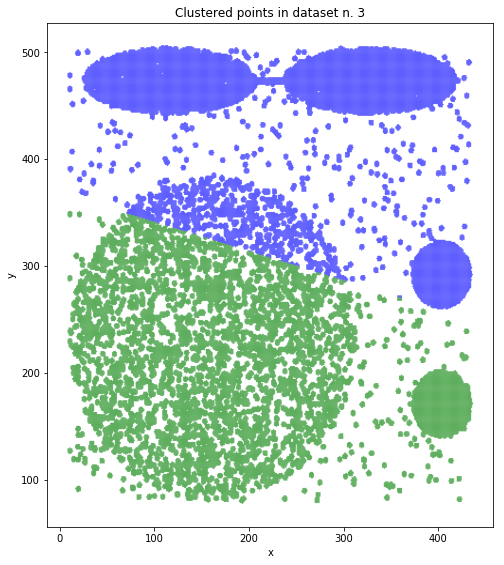

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data3[i,0] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    data_list_y = [data3[i,1] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

In [32]:
def wss(data_list, k, n_samples_x):
    kmean = KMeans(n_clusters=k, random_state=0).fit(data_list)
    clusters = kmean.cluster_centers_
    wss_val=0
    for clu in range(k):
        #mette su data_list_x tutte le istanze x che appartengono al cluster k
        data_list_x = [data_list[i,0] for i in range(n_samples_x) if kmean.labels_[i]==clu]
        for j in range (len(data_list_x)):
            wss_val=wss_val + ((data_list_x[j] - clusters[clu][0])**2)
    return(wss_val)

In [42]:
def bss(data_list, k, n_samples_x):
    kmean = KMeans(n_clusters=k, random_state=0).fit(data_list)
    clusters = kmean.cluster_centers_
    c_mean = np.mean(clusters, axis=0)
    bss_val=0
    for clu in range(k):
        data_list_x = [data_list[i,0] for i in range(n_samples_x) if kmean.labels_[i]==clu]
        bss_val=bss_val + (len(data_list_x) * ((clusters[clu][0] - c_mean[0])**2))
    return(bss_val)

In [43]:
wss1=wss(data2, 3, n_samples2)
bss1 =bss(data2, 3, n_samples2)
print("WSS per il Dataset1, usando k=3 e': " +str(wss1))
print("BSS per il Dataset1, usando k=3 e': " +str(bss1))
print("SSE per il Dataset1, usando k=3 e': " +str(wss1+bss1))
 
print("")    
wss2=wss(data2, 4, n_samples2)
bss2 =bss(data2, 4, n_samples2)
print("WSS per il Dataset1, usando k=4 e': " +str(wss2))
print("BSS per il Dataset1, usando k=4 e': " +str(bss2))
print("SSE per il Dataset1, usando k=4 e': " +str(wss2+bss2))

WSS per il Dataset1, usando k=3 e': 1780456.67839
BSS per il Dataset1, usando k=3 e': 4700515.43262
SSE per il Dataset1, usando k=3 e': 6480972.11101

WSS per il Dataset1, usando k=4 e': 1159944.16805
BSS per il Dataset1, usando k=4 e': 5149824.94417
SSE per il Dataset1, usando k=4 e': 6309769.11223


In [25]:
wss(data1, 2, n_samples1)
bss(data1, 2, n_samples1)

72674.7524752
310199.720616


As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with an increasing value of k (the number of clusters) so that the best value of k can be selected.

In [56]:
def best_k(data_list, n_samples_x):
    wss_bss_array = np.zeros(shape=(10,3))
    for i in range(1, 6):
        WSS= wss(data_list, i, n_samples_x)
        BSS=bss(data_list, i, n_samples_x)
        SSE = WSS + BSS
        k=i-1
        wss_bss_array[k] = [WSS, BSS, SSE]
    #siccome voglio minimizzare SSE, allora scelgo quella minima:
    #wss_min_val = wss_bss_array.min(axis=0)[0]
    #wss_min_index = wss_bss_array.argmin(axis=0)[0]
    #bss_max_val= wss_bss_array.max(axis=0)[0]
    #bss_max_index = wss_bss_array.argmax(axis=0)[0]
    #sse_min_val= wss_bss_array.min(axis=0)[2]
    #sse_min_index = wss_bss_array.argmin(axis=0)[2]
    #print("Min value per SSE e': "+str(sse_min_val)+ " con k="+str(sse_min_index+1))
    #print("Max value per BSS e': "+str(bss_max_val)+ " con k="+str(bss_max_index))
    print(wss_bss_array)

In [57]:
best_k(data1, n_samples1)

[[ 345595.36             0.          345595.36      ]
 [  72674.75247525  310199.72061563  382874.47309087]
 [  31262.5         314415.          345677.5       ]
 [  22975.          343365.          366340.        ]
 [  15162.5         349451.          364613.5       ]
 [      0.               0.               0.        ]
 [      0.               0.               0.        ]
 [      0.               0.               0.        ]
 [      0.               0.               0.        ]
 [      0.               0.               0.        ]]
